# Result Analysis

This notebook is for exploratory analysis of preliminary experiment results to see whether the experiments work as intended.

In [11]:
results_folder = "results-04-16-generous/"
experiment_folder = "experiment-results/"

from pathlib import Path
Path(f"figures/{results_folder}").mkdir(parents=True, exist_ok=True)

In [12]:
display_names = {
    "mock-t0.0" : "mock",
    "fsc-openchat-3.5-0106-t0.0" : "openchat-3.5"
}
delimiter = "--"
display_delimiter = " & "

def improve_model_names(model_series):
    return model_series.apply(lambda x: display_delimiter.join([display_names[y] for y in x.split(delimiter)]))

In [13]:
import pandas as pd
import os

In [14]:
experiment_csvs = [file for file in os.listdir(results_folder+experiment_folder) if file.endswith("csv")]
experiment_csvs.sort()
experiment_csvs

['all.csv',
 'board size.csv',
 'opponent difficulty.csv',
 'risk.csv',
 'word assignments.csv',
 'word frequency.csv',
 'wordlist.csv']

In [15]:
board_size_experiment = pd.read_csv(results_folder+experiment_folder+experiment_csvs[1])
board_size_experiment.columns

Index(['model', 'experiment name', 'experiment variable', 'Aborted',
       'Average Cluegiver Number of Targets', 'Average Cluegiver Team F1',
       'Average Cluegiver Team Precision', 'Average Cluegiver Team Recall',
       'Average Guesser Number of Guesses',
       'Average Guesser Number of Revealed Words',
       'Average Guesser Number of Unrevealed Guesses',
       'Average Guesser Target F1', 'Average Guesser Target Precision',
       'Average Guesser Target Recall', 'Average Guesser Team F1',
       'Average Guesser Team Precision', 'Average Guesser Team Recall',
       'Cluegiver ignore false targets or guesses',
       'Cluegiver ignore number of targets', 'Cluegiver ignore rambling',
       'Cluegiver reprompt on error', 'Cluegiver strip words', 'Efficiency',
       'Episode Negative Recall', 'Episode Recall',
       'Game ended through assassin',
       'Guesser ignore false targets or guesses',
       'Guesser ignore number of targets', 'Guesser ignore rambling',
      

In [16]:
# efficiency, episode recall, episode negative recall, main score
main_scores = board_size_experiment[['model', 'experiment name', 'Main Score', 'Episode Recall', 'Episode Negative Recall', 'Efficiency']]
main_scores.loc[:, 'Main Score'] = main_scores['Main Score']/100
main_scores.set_index(['model', 'experiment name'], inplace = True)
main_scores

Main Score  \
model                                              experiment name               
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... small                0.6631   
mock-t0.0--mock-t0.0                               small                0.1144   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... medium               0.6340   
mock-t0.0--mock-t0.0                               medium               0.2168   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... large                0.7060   
mock-t0.0--mock-t0.0                               large                0.2674   

                                                                    Episode Recall  \
model                                              experiment name                   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... small                  0.733500   
mock-t0.0--mock-t0.0                               small                  0.133200   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... medium                 0.700000   
mock-t0.0--mock-t0.0                               medium                 0.260000   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... large                  0.825429   
mock-t0.0--mock-t0.0                               large                  0.310900   

                                                                    Episode Negative Recall  \
model                                              experiment name                            
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... small                           0.833200   
mock-t0.0--mock-t0.0                               small                           0.799800   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... medium                          0.830000   
mock-t0.0--mock-t0.0                               medium                          0.800000   
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... large                           0.803571   
mock-t0.0--mock-t0.0                               large                           0.806100   

                                                                    Efficiency  
model                                              experiment name              
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... small              0.625000  
mock-t0.0--mock-t0.0                               small              0.100000  
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... medium             0.591700  
mock-t0.0--mock-t0.0                               medium             0.187500  
fsc-openchat-3.5-0106-t0.0--fsc-openchat-3.5-01... large              0.703429  
mock-t0.0--mock-t0.0                               large              0.241000

In [17]:
main_scores = main_scores[::-1]

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [19]:
cmap = matplotlib.colormaps.get_cmap('Set2')
cmap = matplotlib.colors.ListedColormap(cmap.colors[0:4])

def create_main_score_vis(data, experiment_name):
    experiment_name = experiment_name.removesuffix('.csv')
    fig, ax = plt.subplots()
    data.plot.bar(ax=ax, ylim=[0,1], xlabel = experiment_name, ylabel = "Score", colormap=cmap, edgecolor = 'black', rot=0, title = "Main Scores")
    
    bars = ax.patches
    hatches = ''.join(hatch*len(df) for hatch in 'n/'*4)

    for bar, hatch in zip(bars, hatches):
        if hatch == 'n':
            continue
        bar.set_hatch(hatch)
    
    main_score_patch = mpatches.Patch(color = cmap(0), label = "Main Score")
    episode_recall_patch = mpatches.Patch(color = cmap(1), label = "Episode Recall")
    episode_neg_recall_patch = mpatches.Patch(color = cmap(2), label = "Episode Negative Recall")
    efficiency_patch = mpatches.Patch(color = cmap(3), label = "Efficiency")
    model1_patch = mpatches.Patch(facecolor="None", edgecolor="black", label = "open-chat-3.5")
    model2_patch = mpatches.Patch(facecolor="None", edgecolor="black", hatch="///", label = "mock")

    ax.legend(loc = "lower left", handles = [main_score_patch, episode_recall_patch, episode_neg_recall_patch, efficiency_patch, model1_patch, model2_patch], bbox_to_anchor=(1.0, 0.0))

    plt.show()
    fig.savefig(f'figures/{results_folder}{experiment_name}-main scores.png', dpi=400, bbox_inches = 'tight')

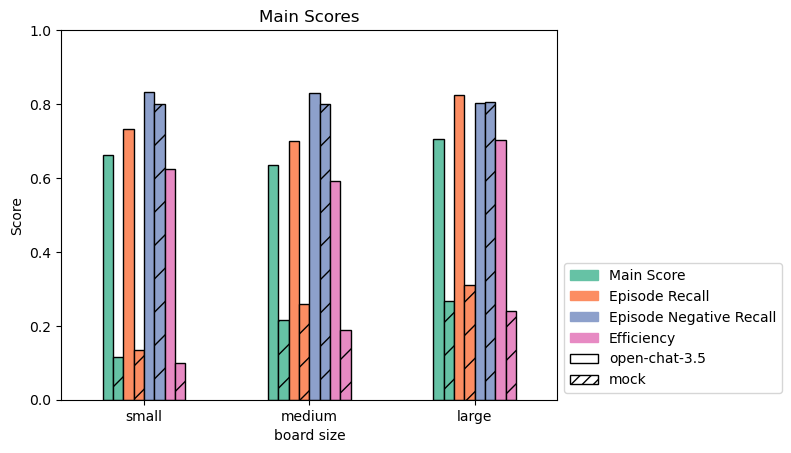

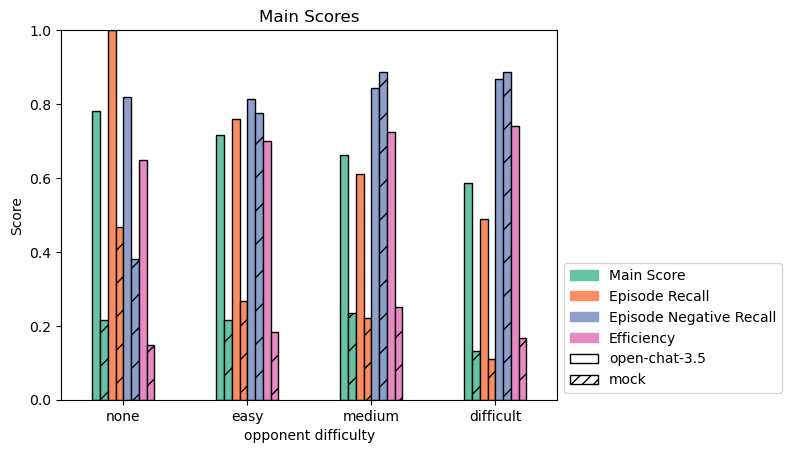

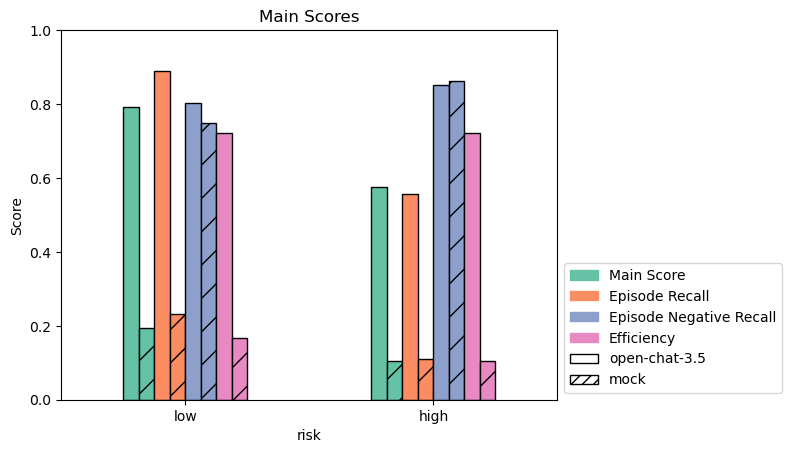

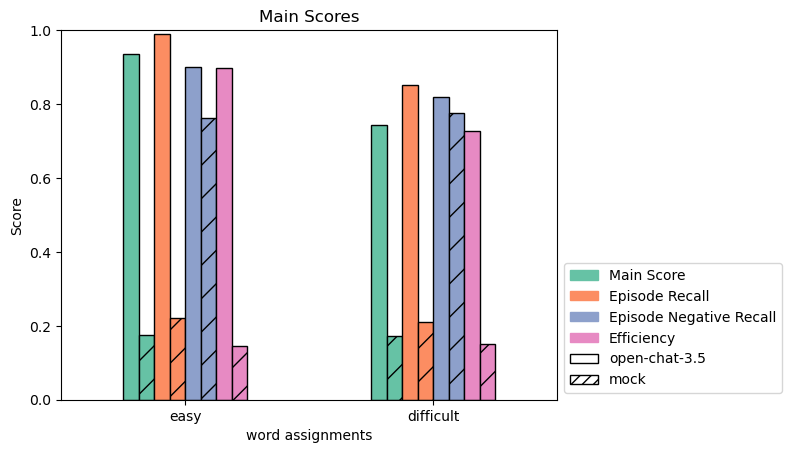

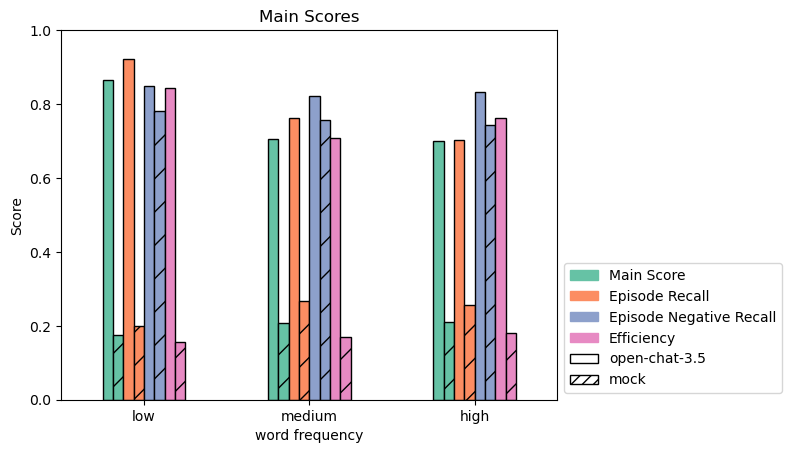

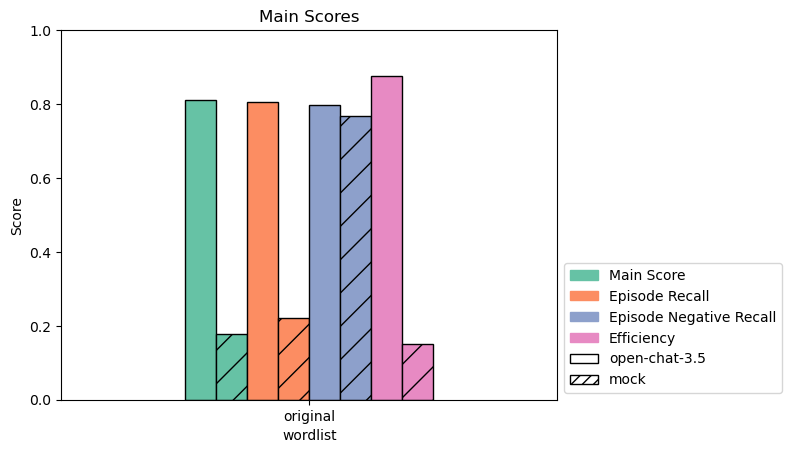

In [20]:
for experiment in experiment_csvs:
    if experiment == "all.csv":
        continue
    df = pd.read_csv(results_folder+experiment_folder+experiment)
    df = df[['model', 'experiment name', 'Main Score', 'Episode Recall', 'Episode Negative Recall', 'Efficiency']]
    df.loc[:, 'Main Score'] = df['Main Score']/100
    df.loc[:, 'model'] = improve_model_names(df['model'])
    df.set_index(['model', 'experiment name'], inplace = True)
    df = df.unstack(level = 0, sort = False)
    create_main_score_vis(df, experiment)

# Generic metric visualisation

In [21]:
def create_generic_visualisation(data, experiment_name, columns, colours = 'Set2', ylim = None):
    cmap = matplotlib.colormaps.get_cmap(colours)
    cmap = matplotlib.colors.ListedColormap(cmap.colors[0:max(len(columns), 3)])
    extended_columns = ['model', 'experiment name']
    extended_columns.extend(columns)
    data = data[extended_columns]
    experiment_name = experiment_name.removesuffix('.csv')
    data.loc[:, 'model'] = improve_model_names(data['model'])
    if 'Main Score' in columns:
        data.loc[:, 'Main Score'] = data['Main Score']/100
    for poi in ['model']: # ,'experiment name'
        instances = data[poi].unique()
        for instance in instances:
            df_instance = data[data[poi] == instance]
            df_instance = df_instance.drop(columns=[poi])
            index_col = df_instance.select_dtypes(exclude='number').columns[0]
            df_instance.set_index(index_col, inplace=True)
            
            fig, ax = plt.subplots()
            df_instance.plot.bar(ax=ax, ylim=ylim, xlabel = experiment_name, ylabel = "Score", colormap=cmap, edgecolor = 'black', title=f'{experiment_name}: {instance}', rot=0)
            ax.legend(loc = "lower left", bbox_to_anchor=(1.0, 0.0))
            plt.show()
            fig.savefig(f'figures/{results_folder}{experiment_name}-{", ".join(columns)}.png', dpi=400, bbox_inches = 'tight')

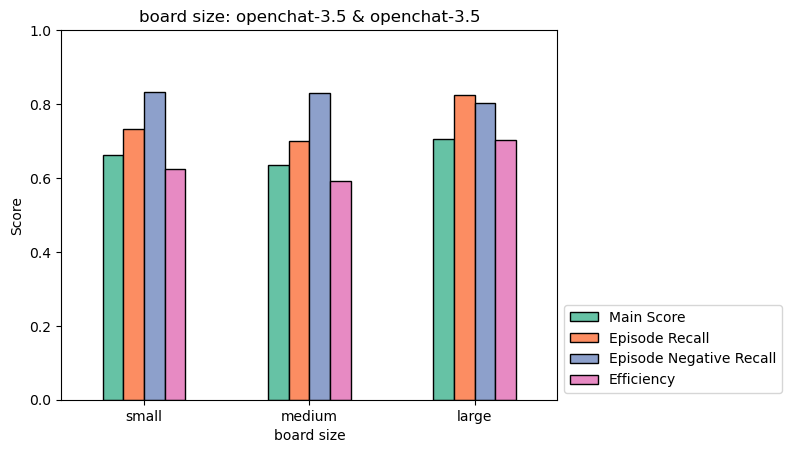

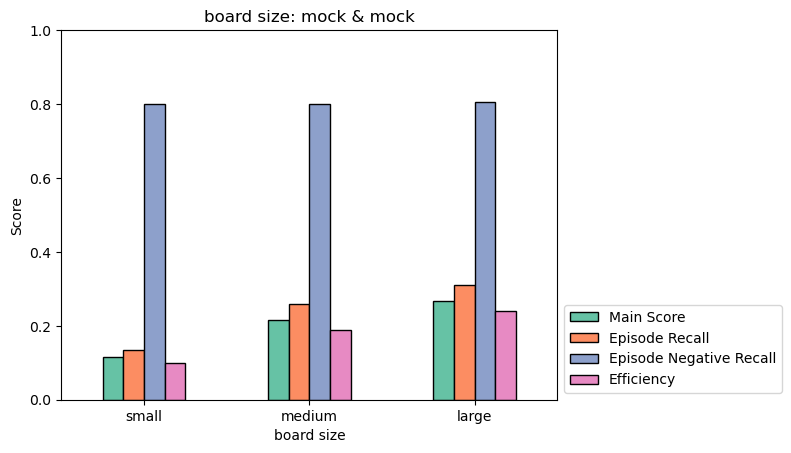

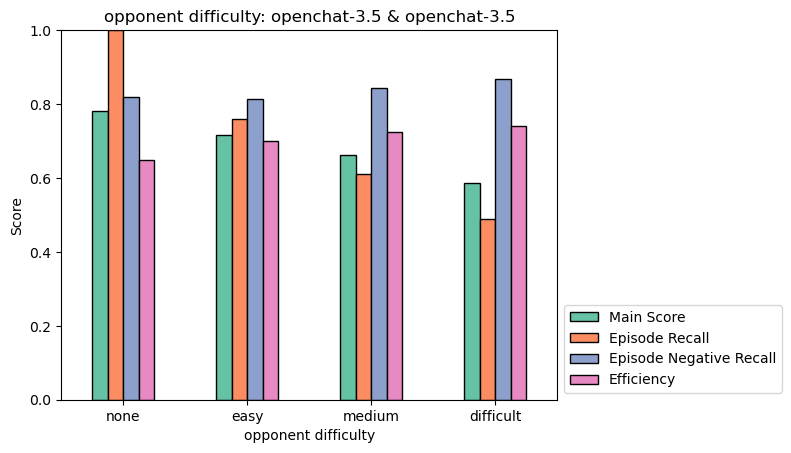

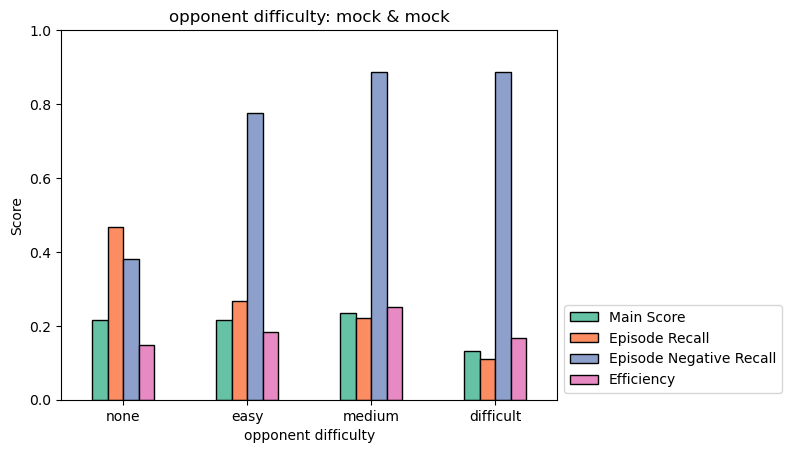

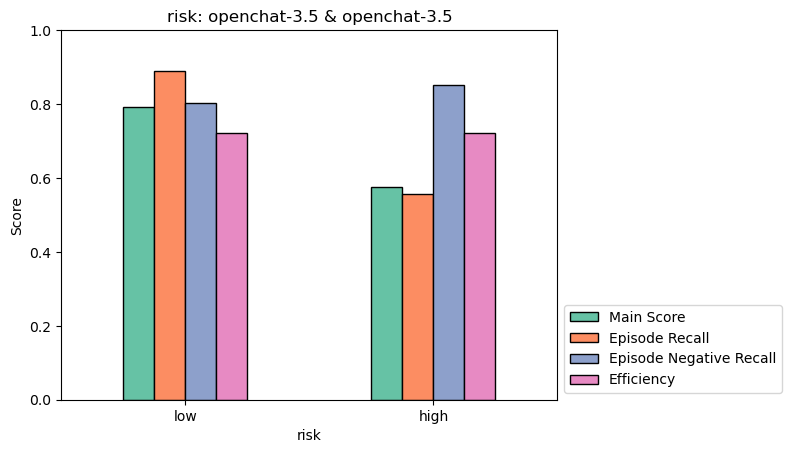

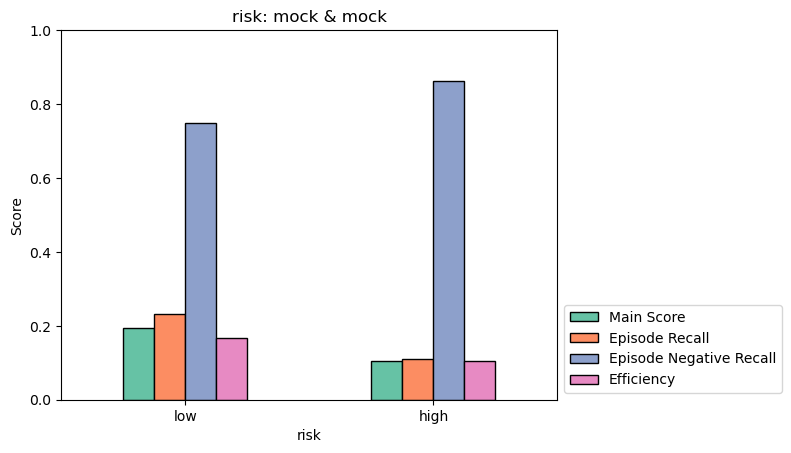

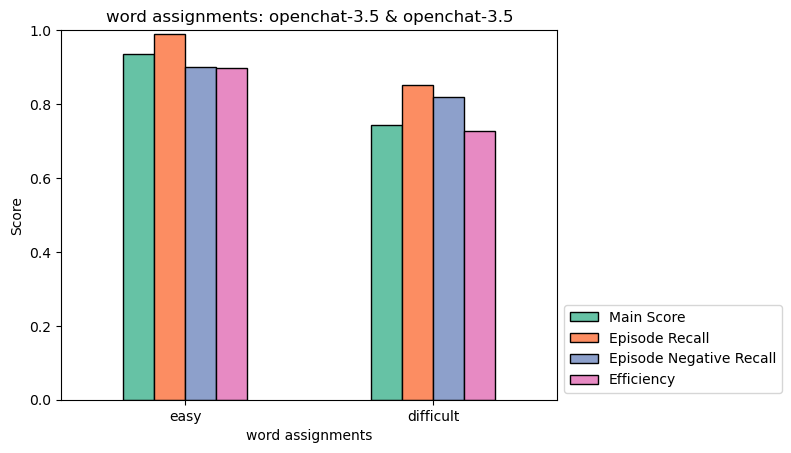

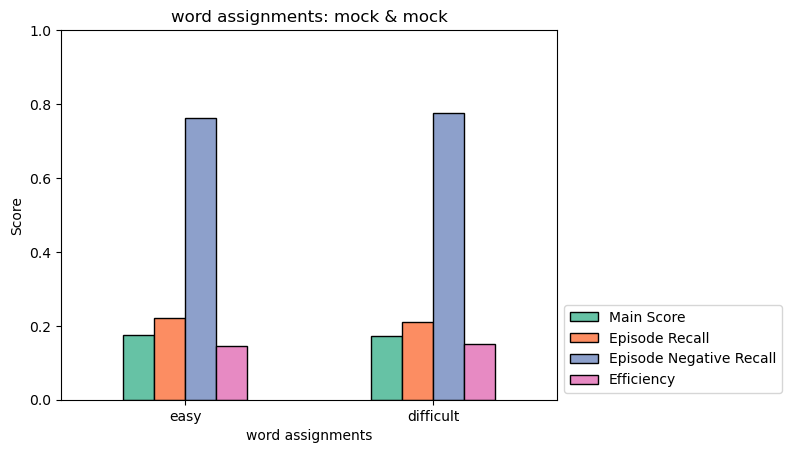

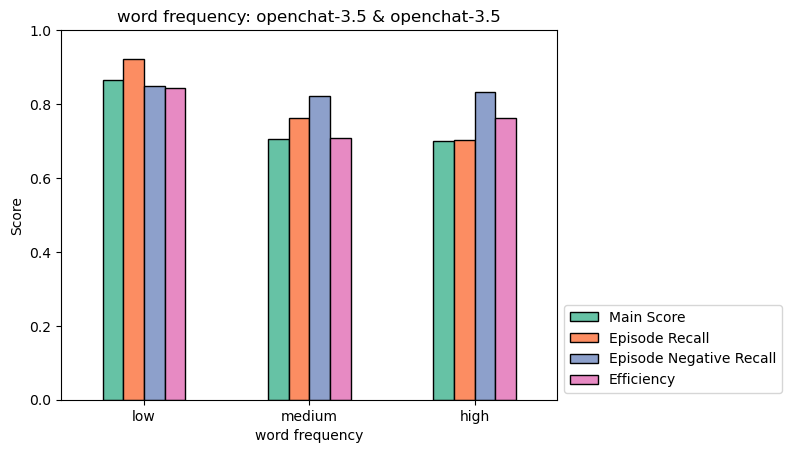

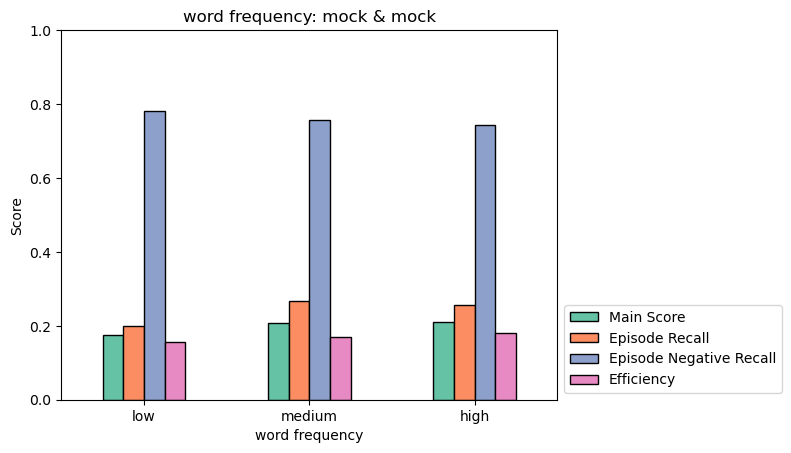

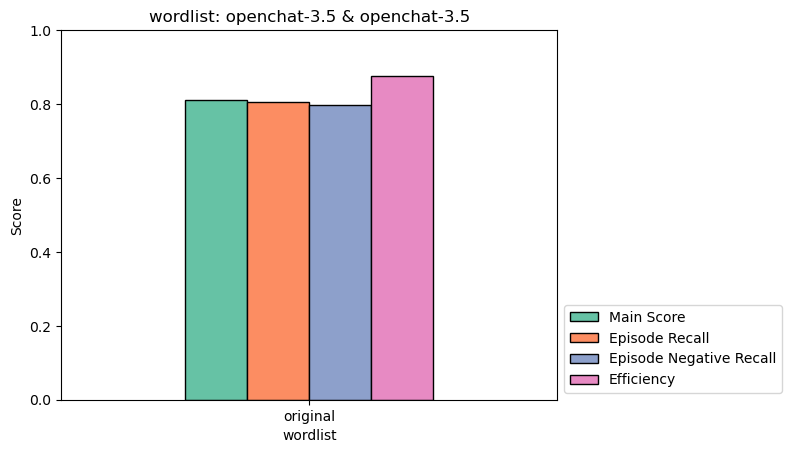

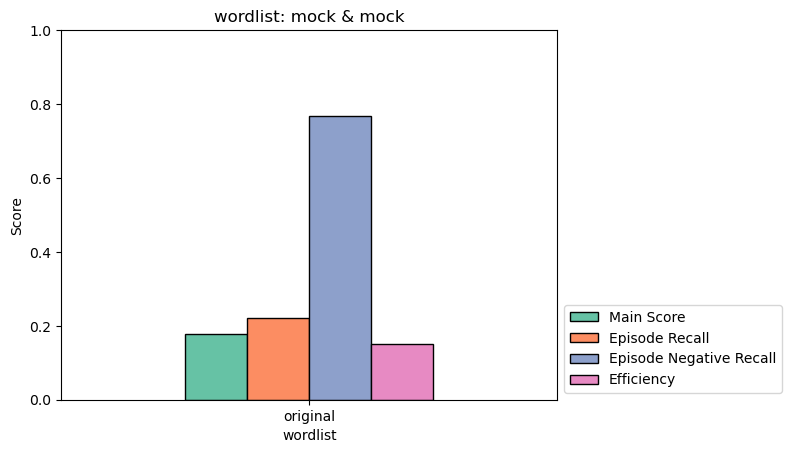

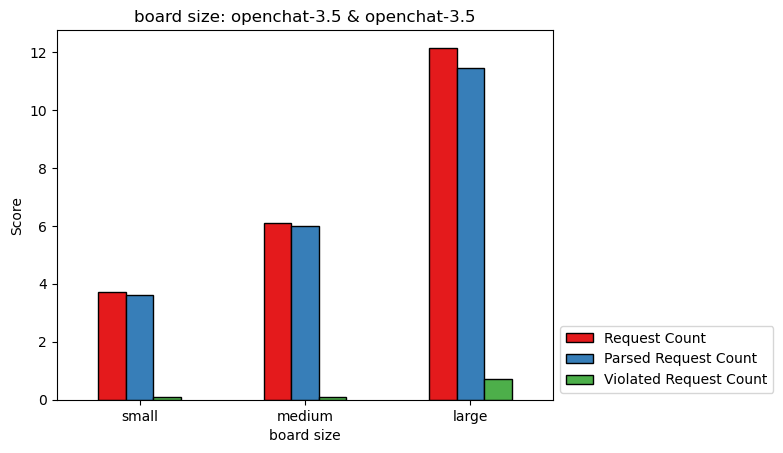

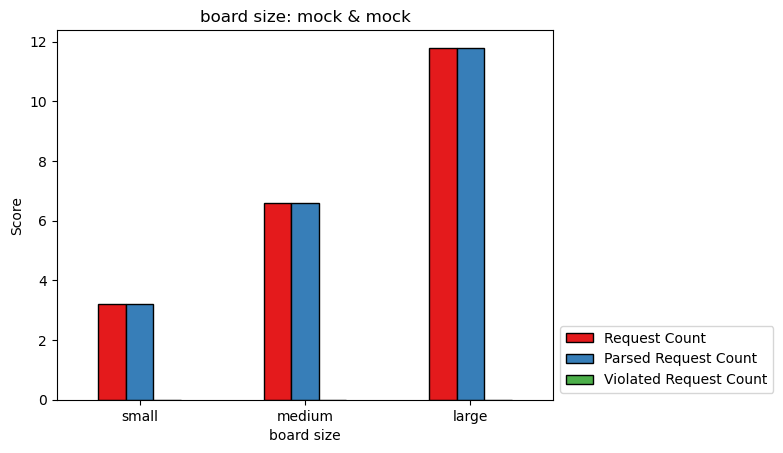

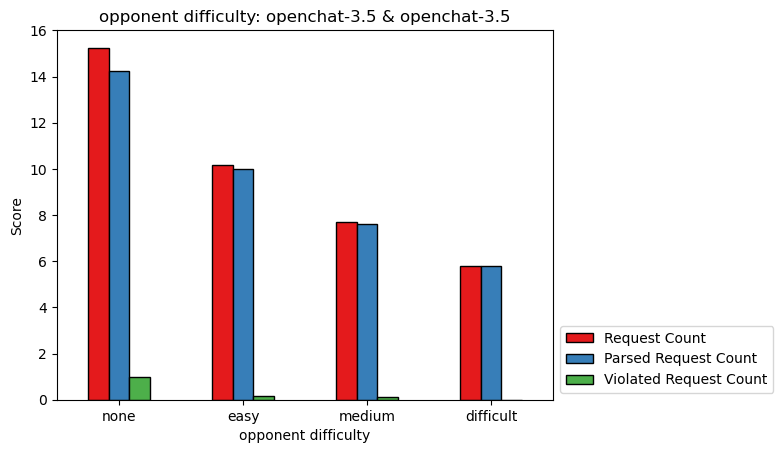

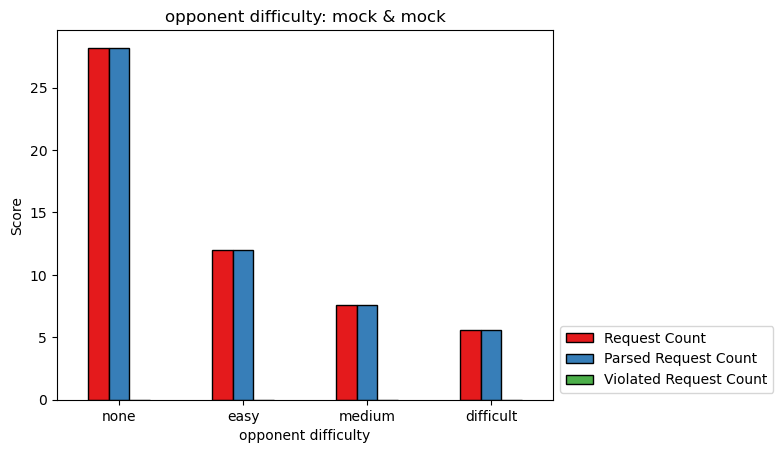

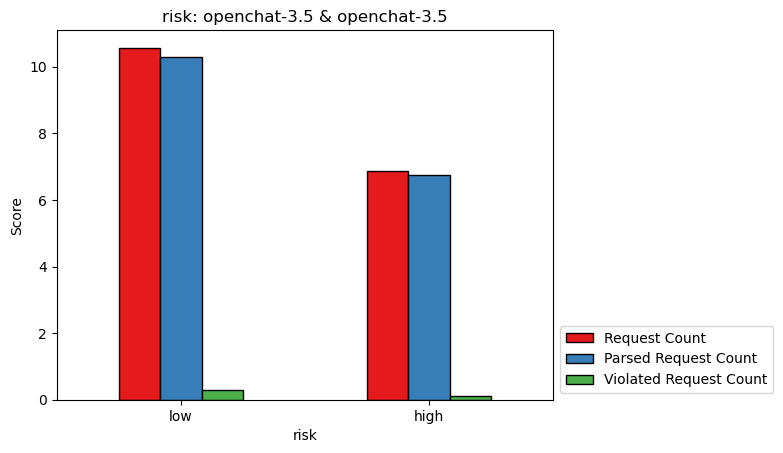

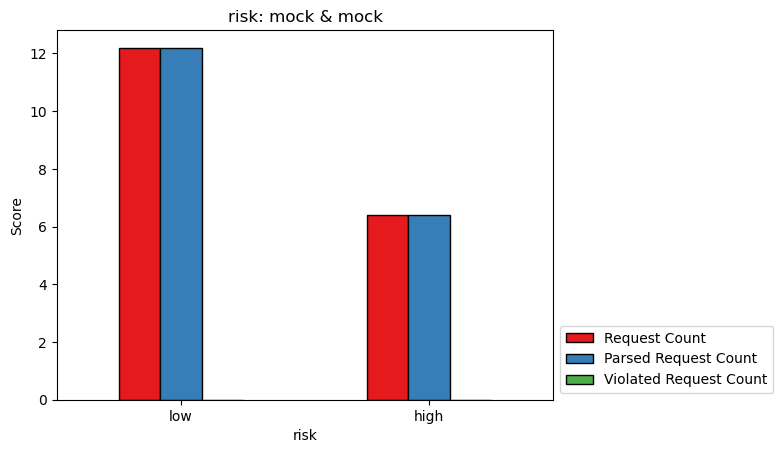

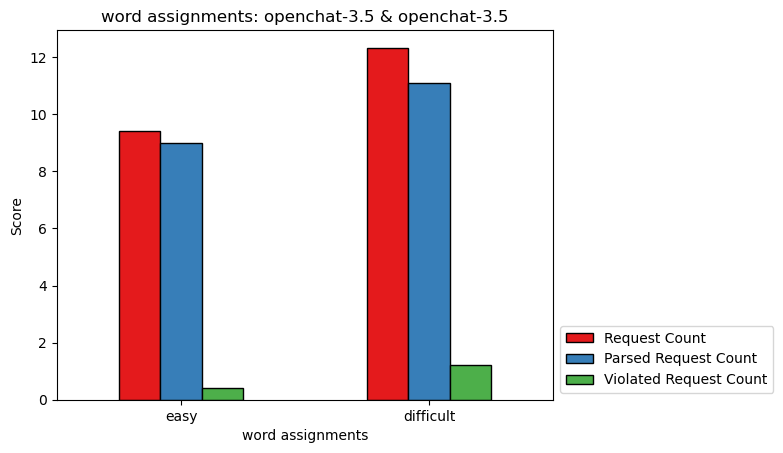

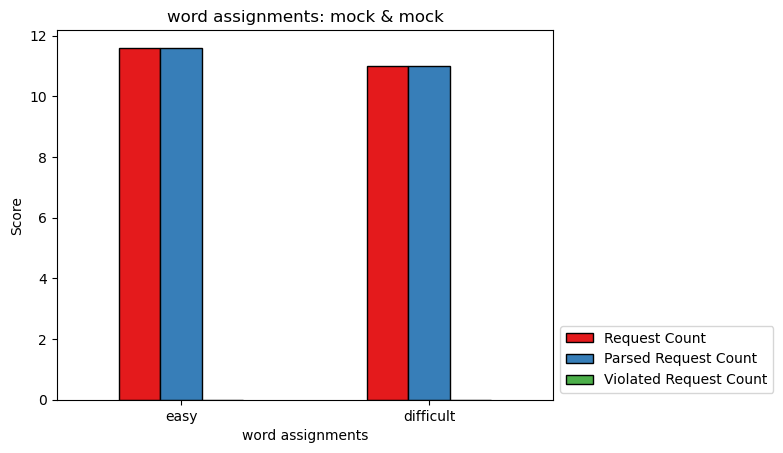

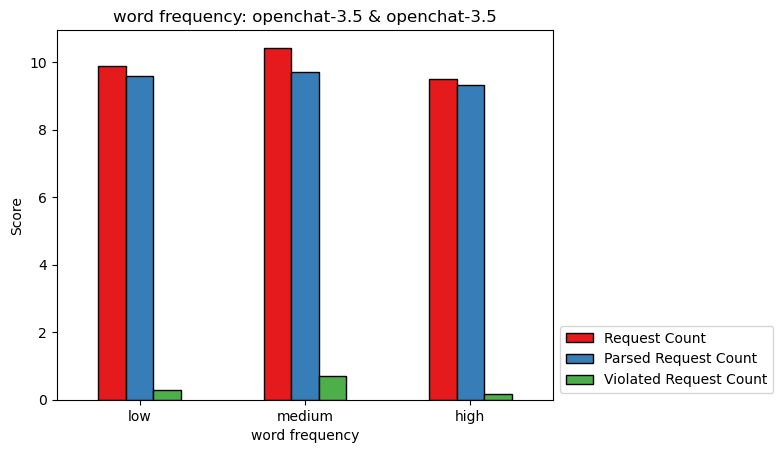

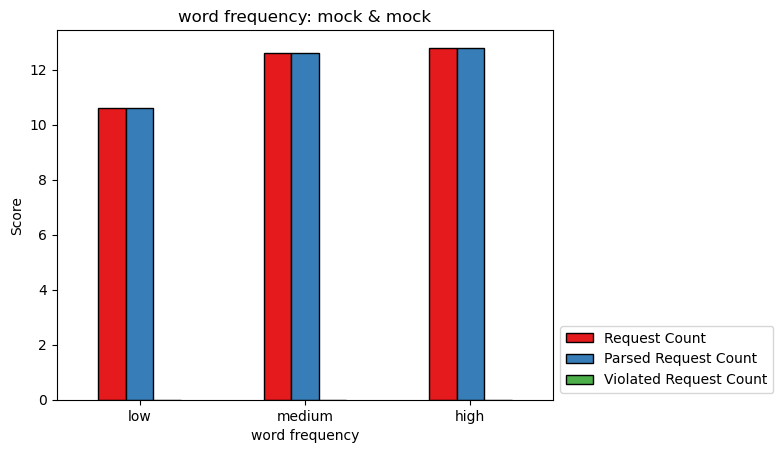

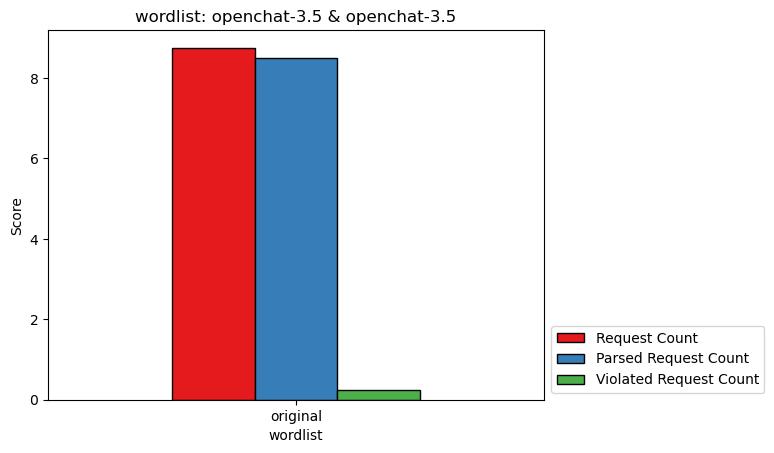

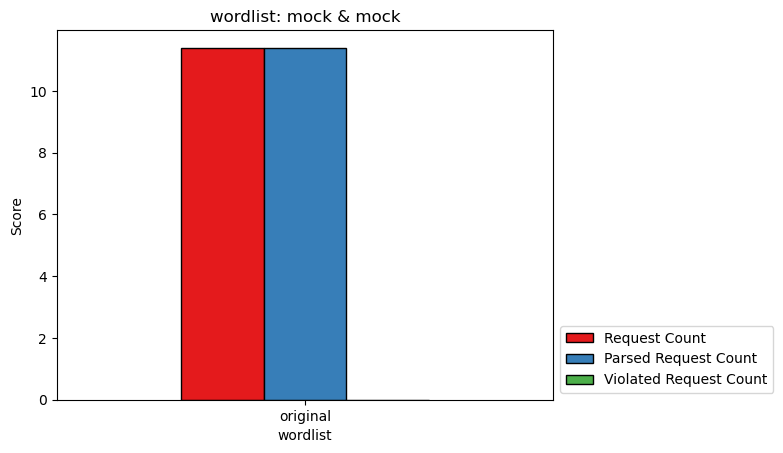

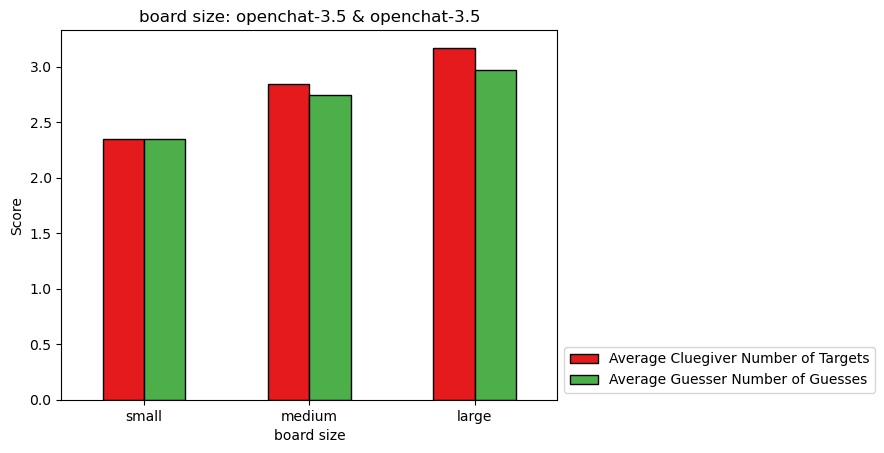

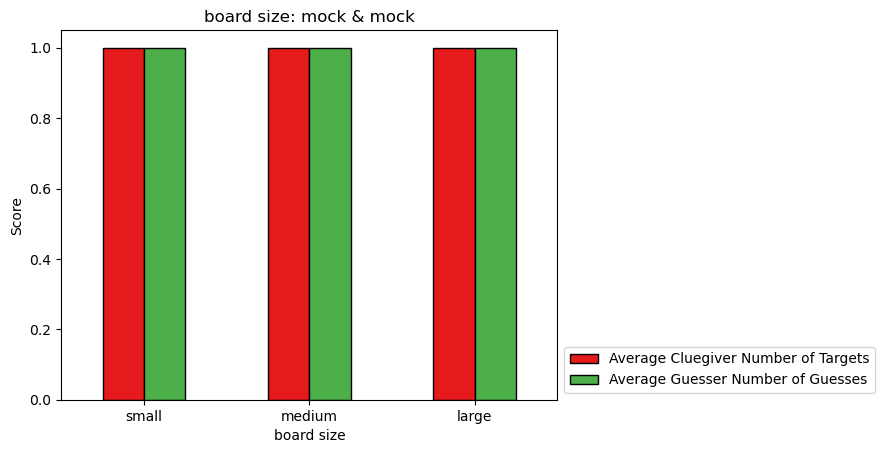

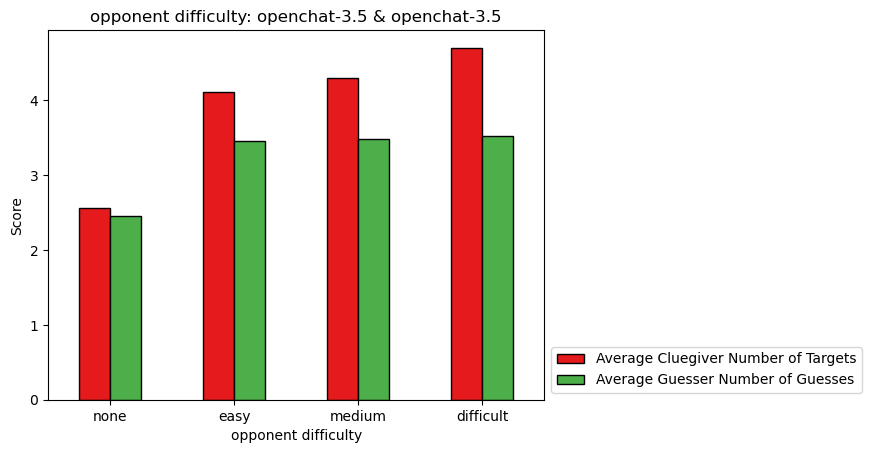

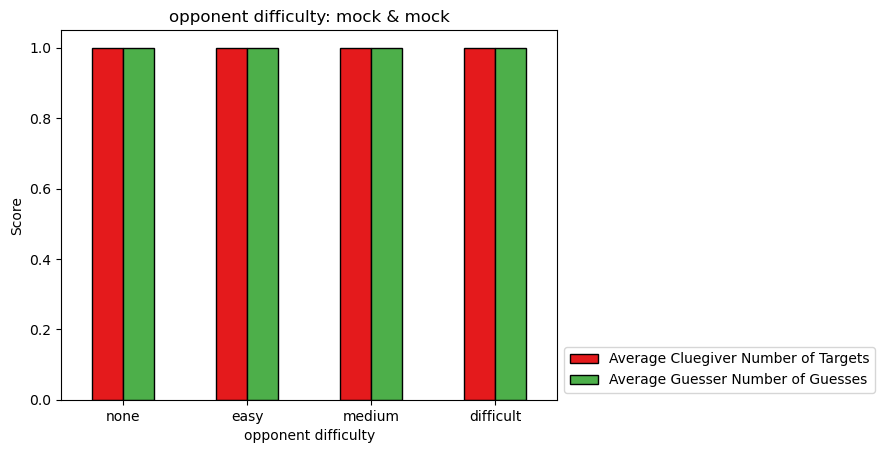

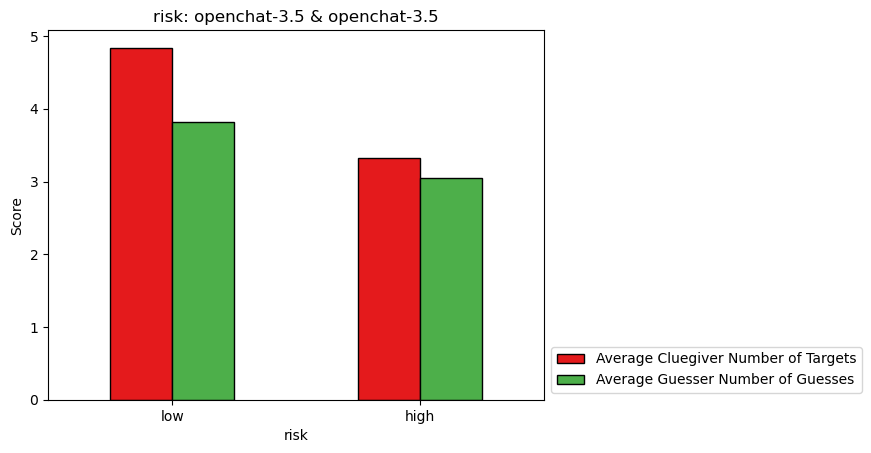

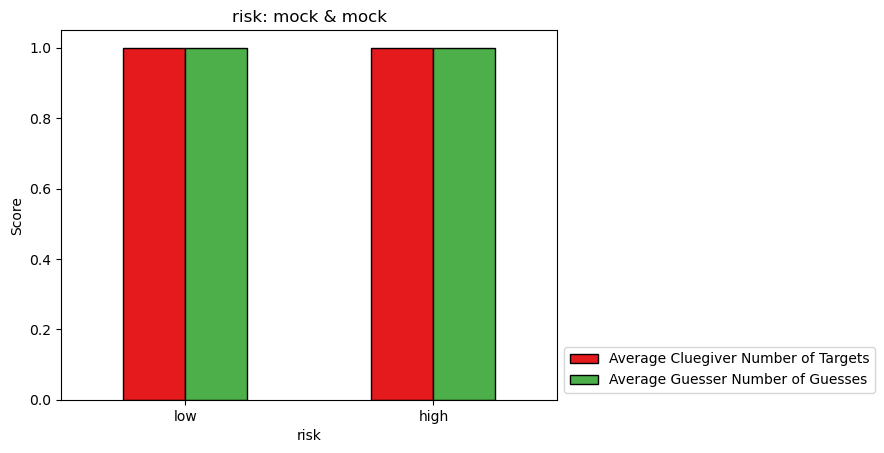

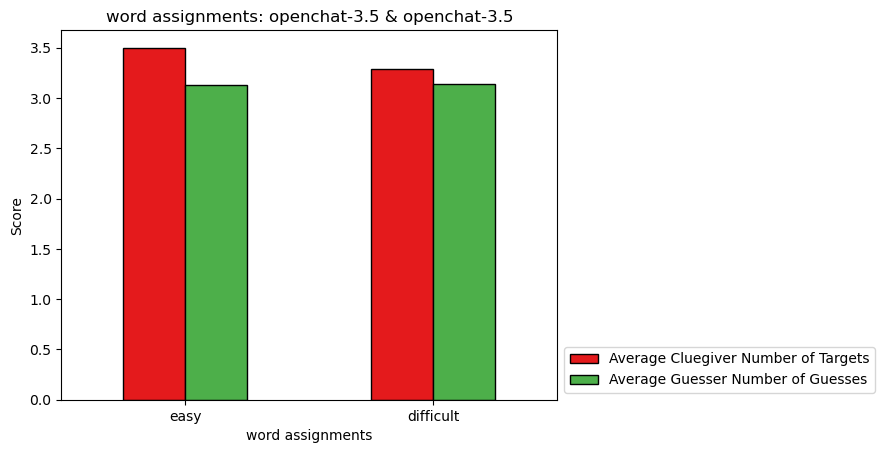

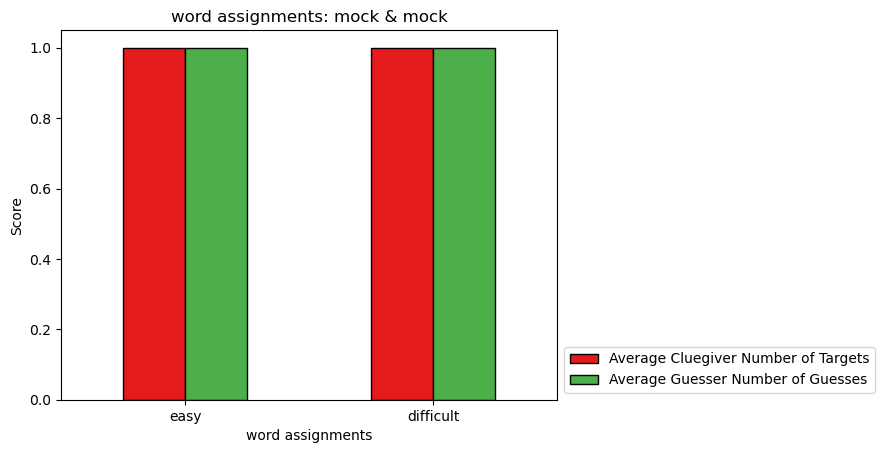

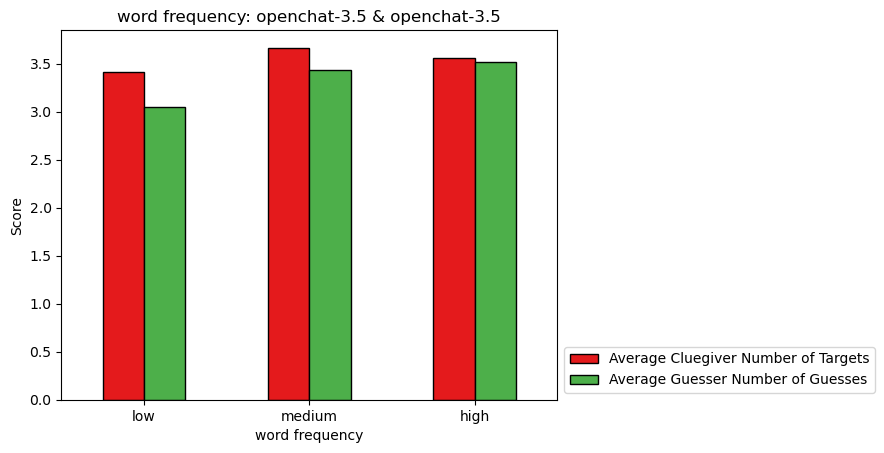

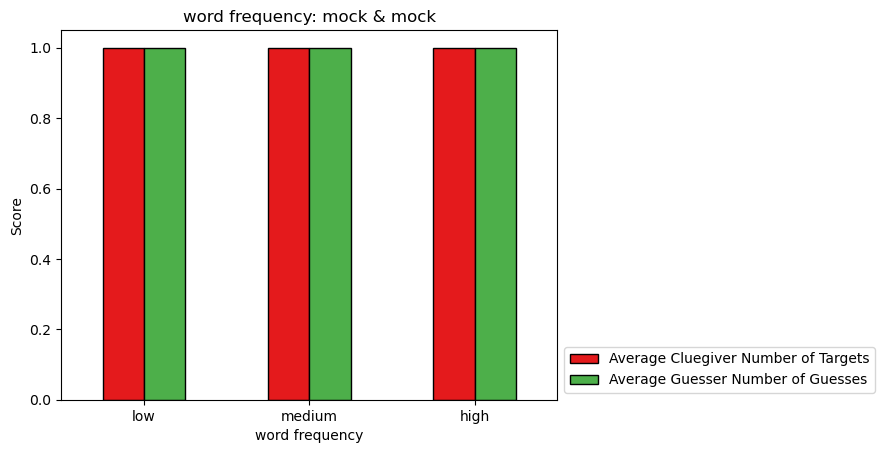

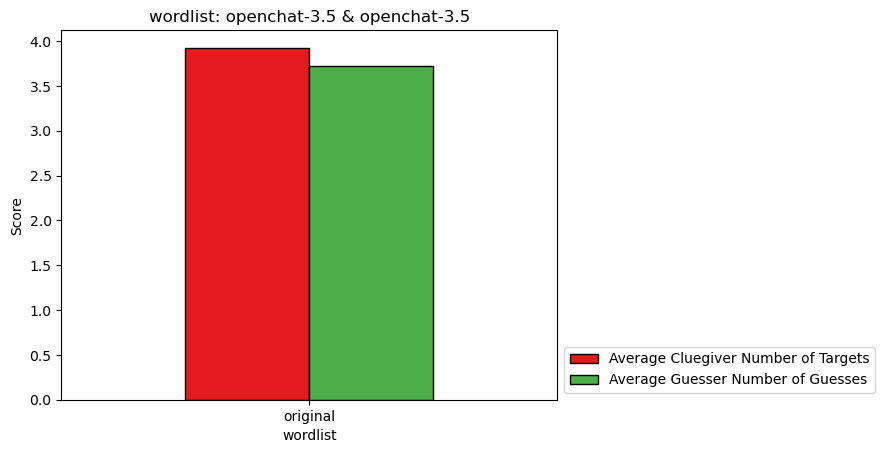

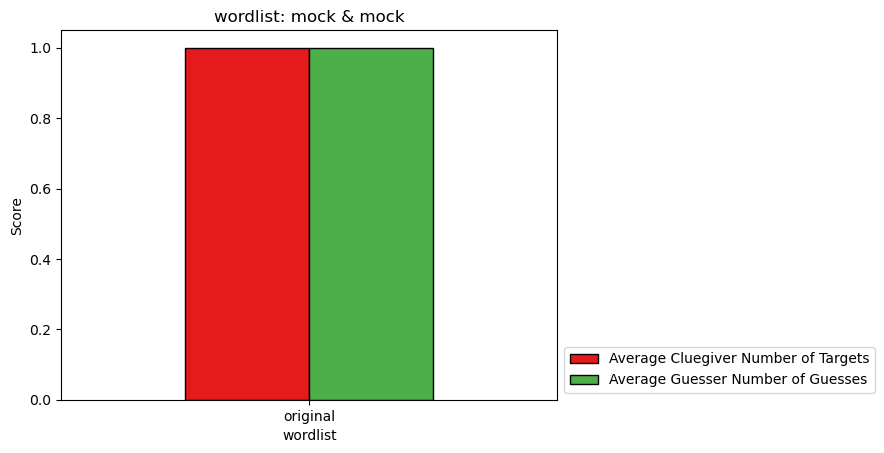

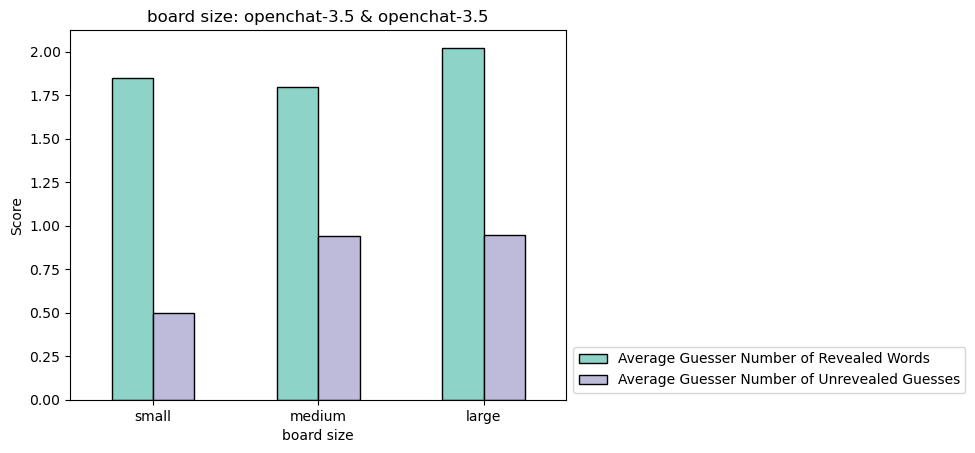

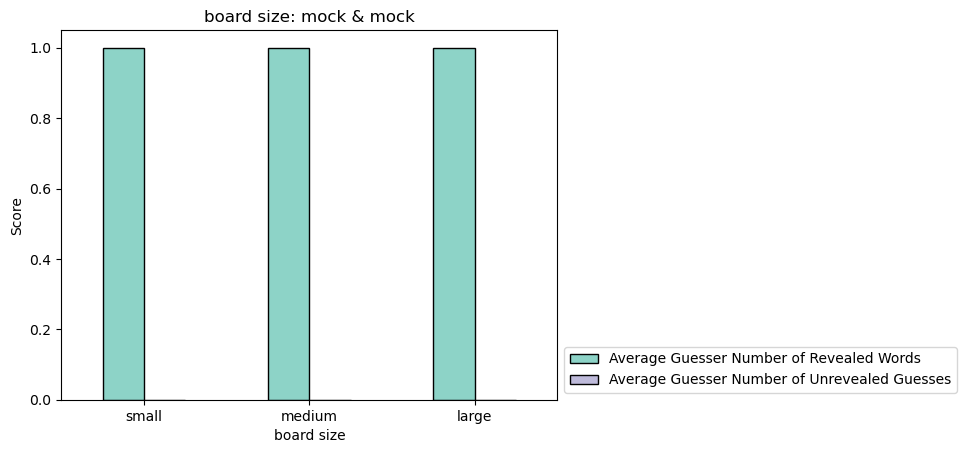

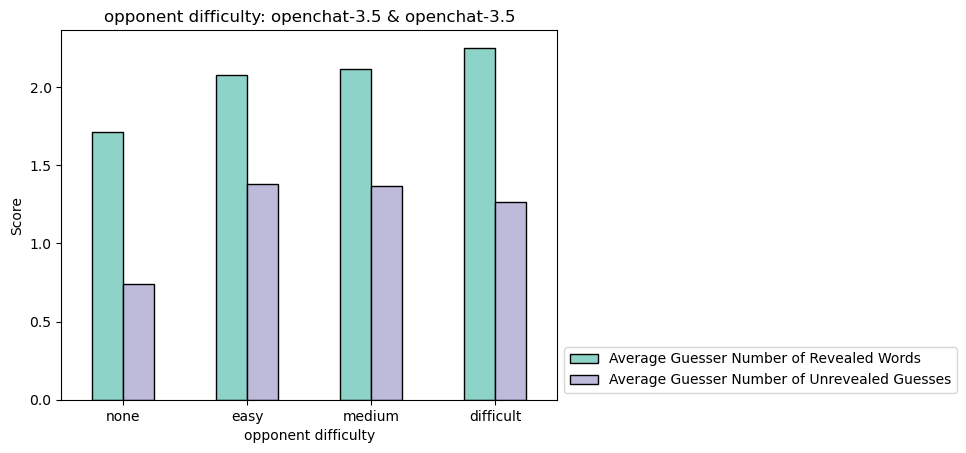

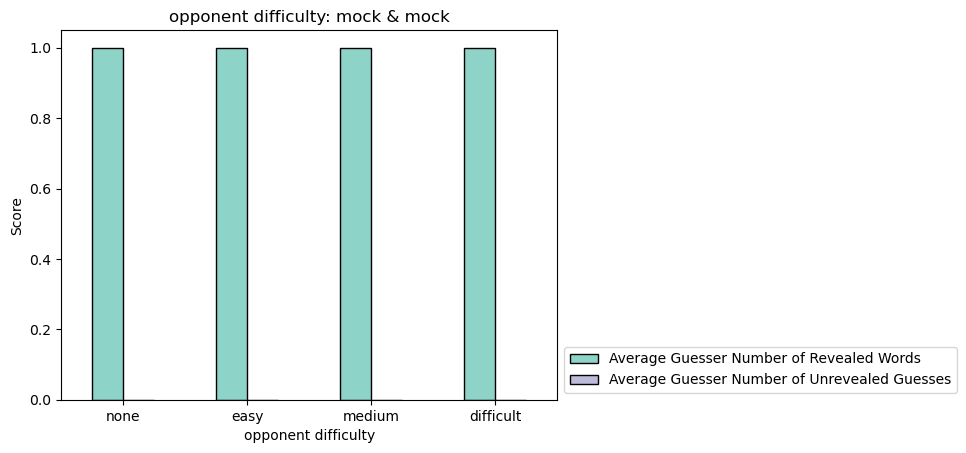

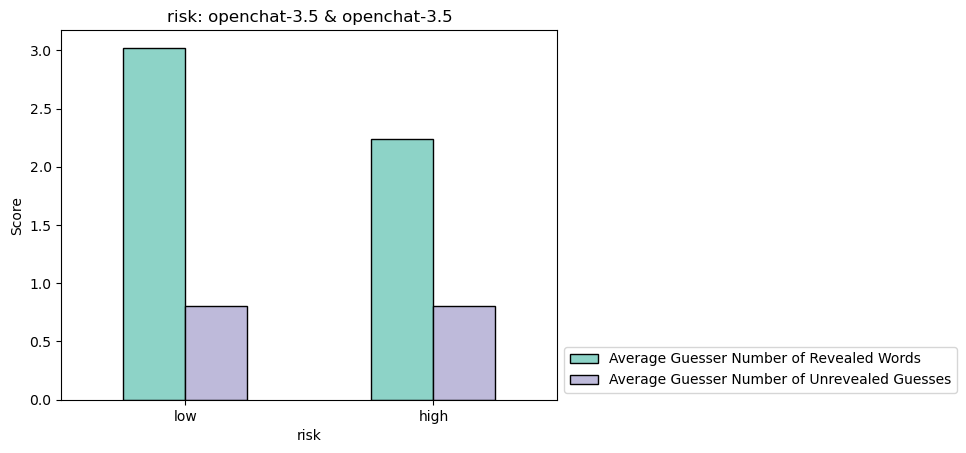

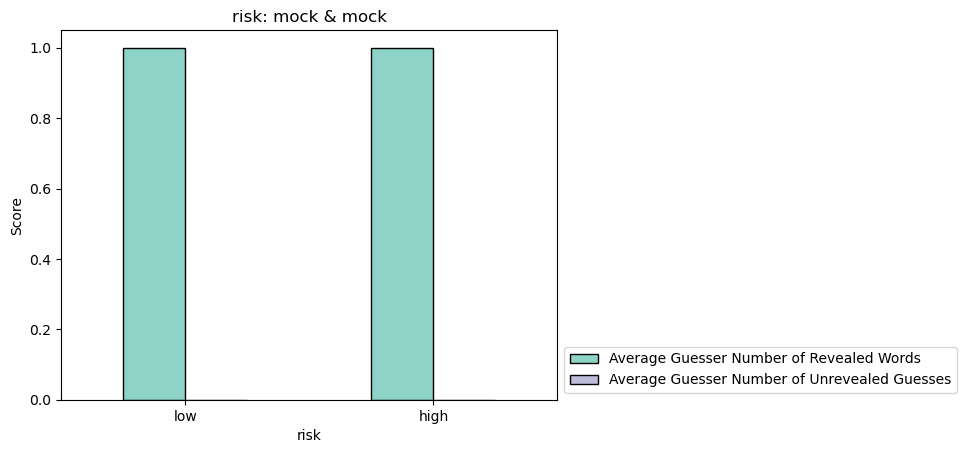

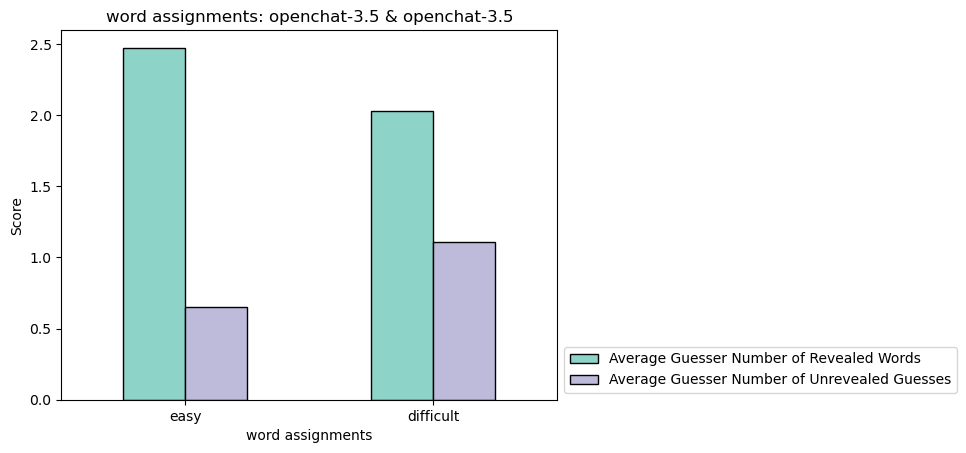

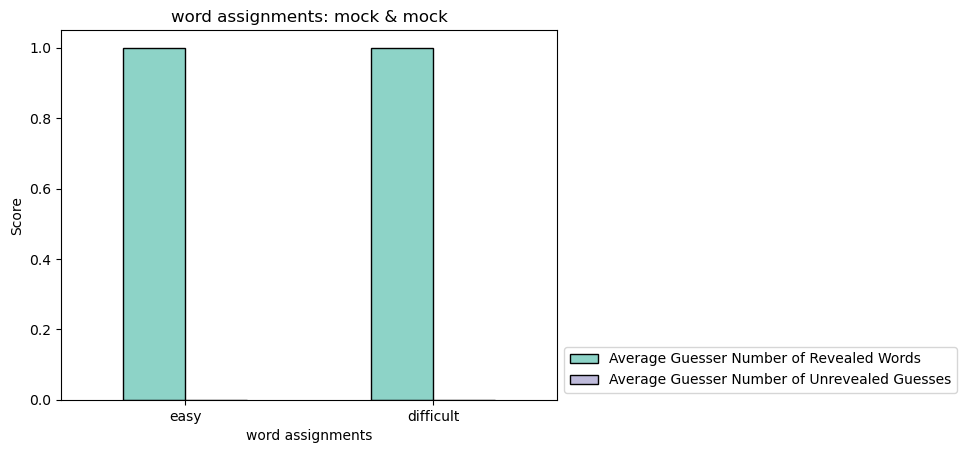

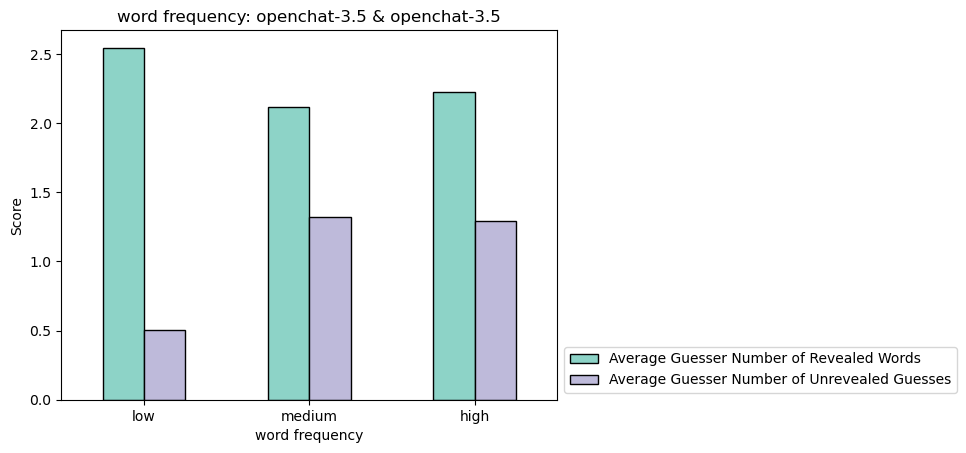

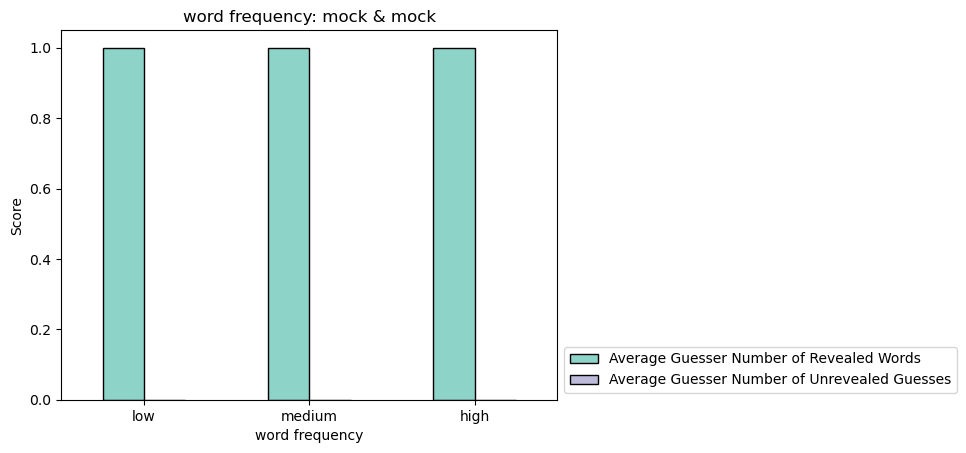

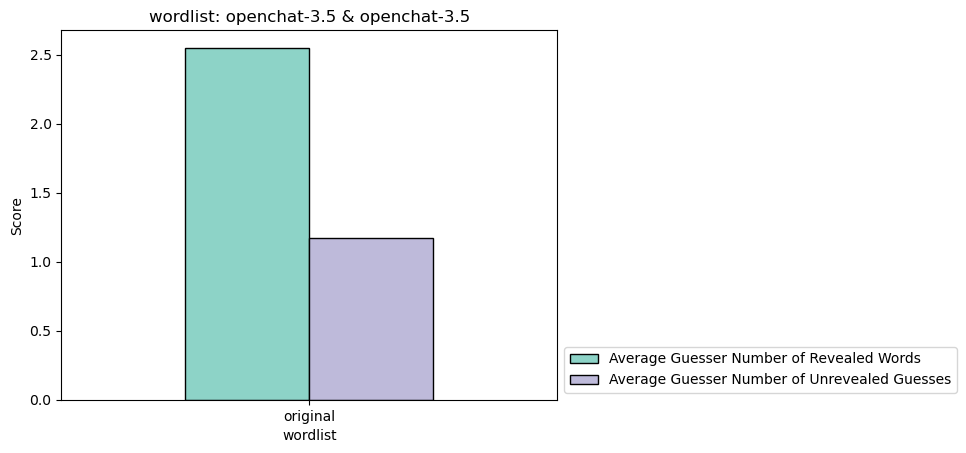

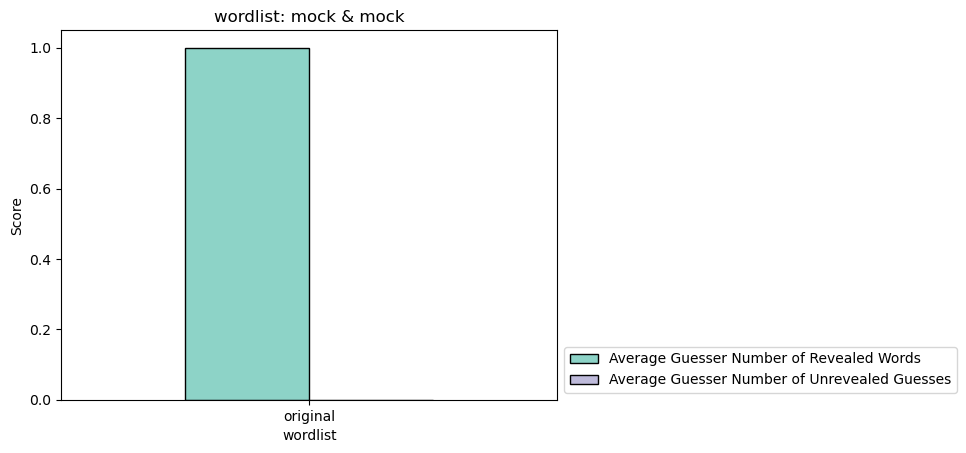

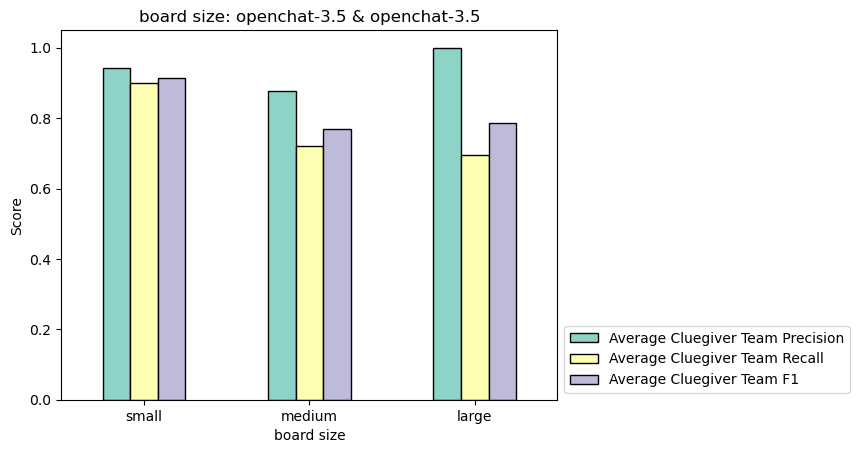

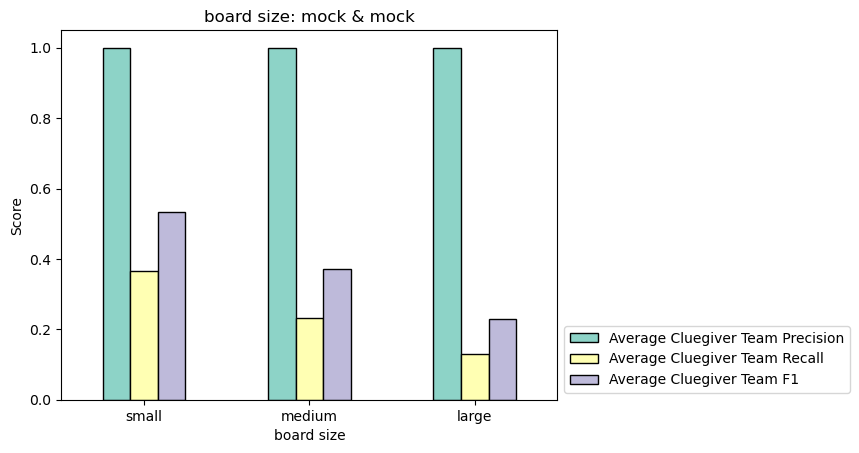

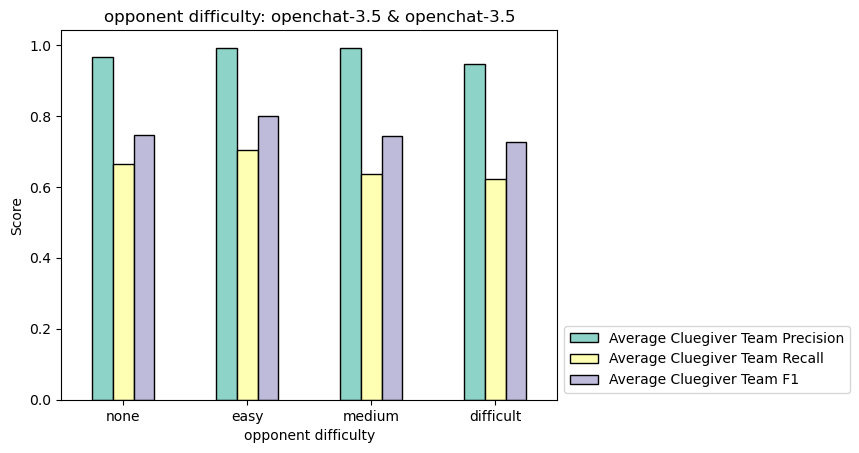

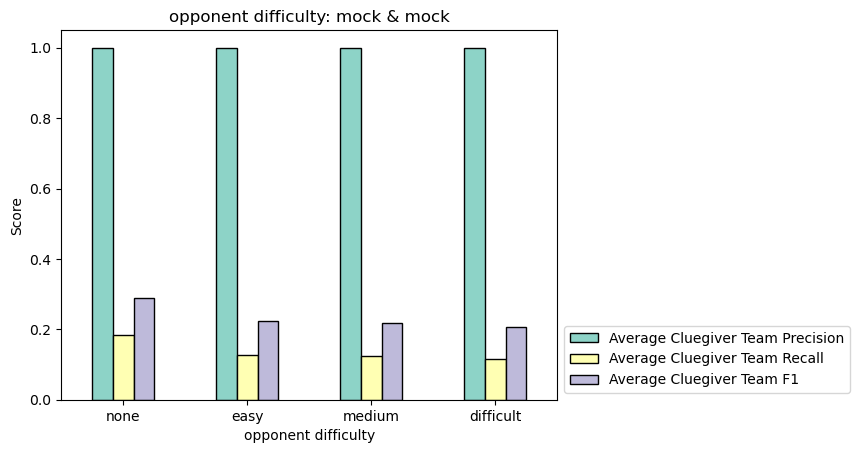

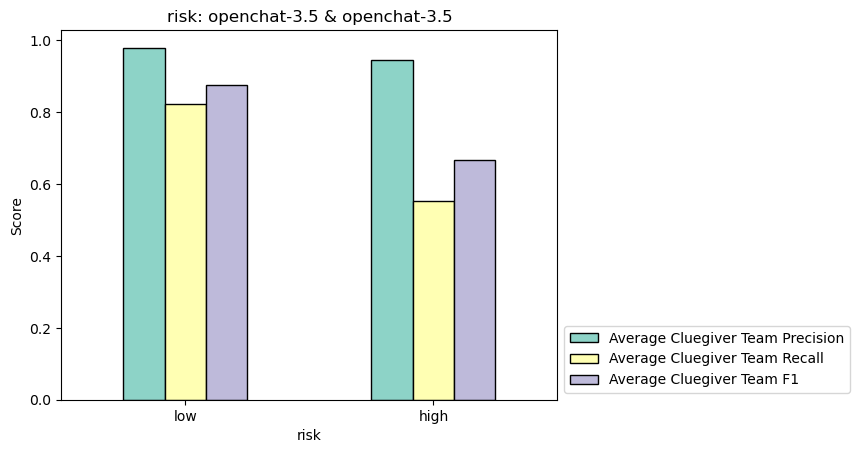

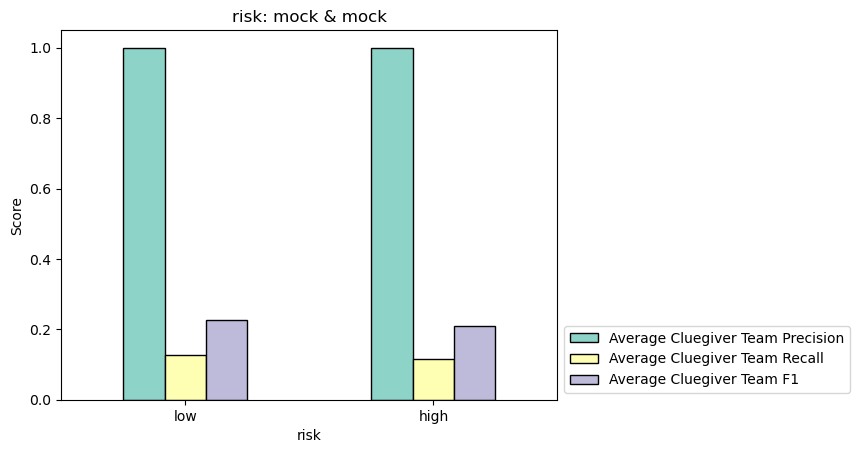

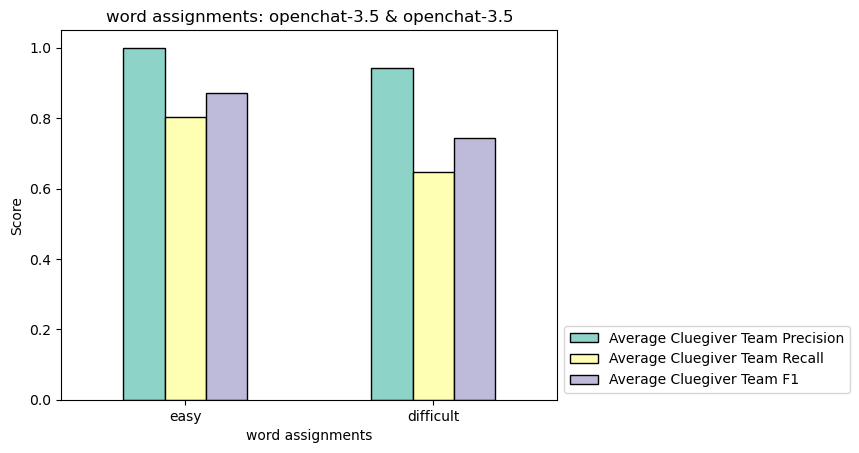

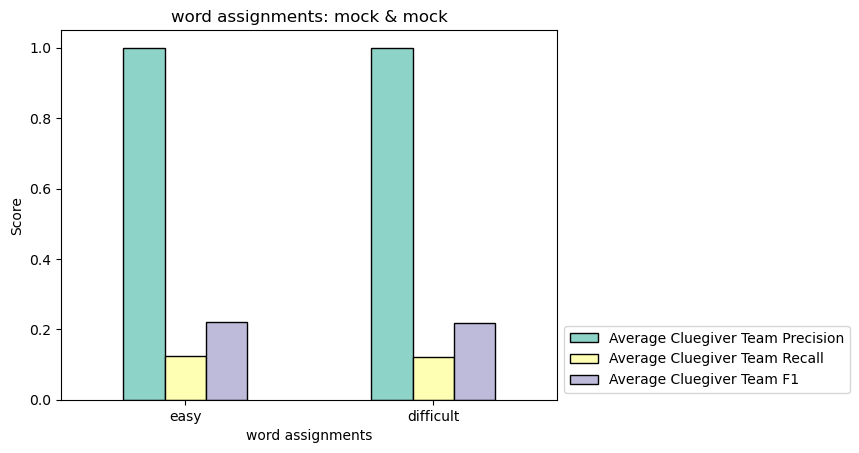

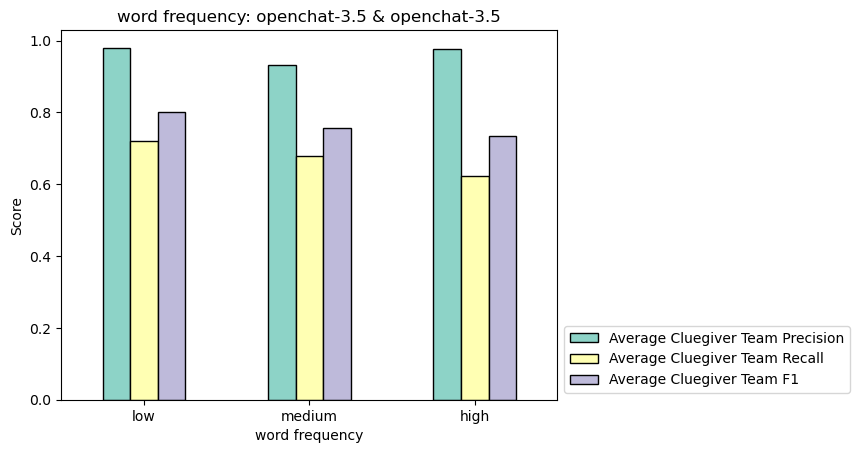

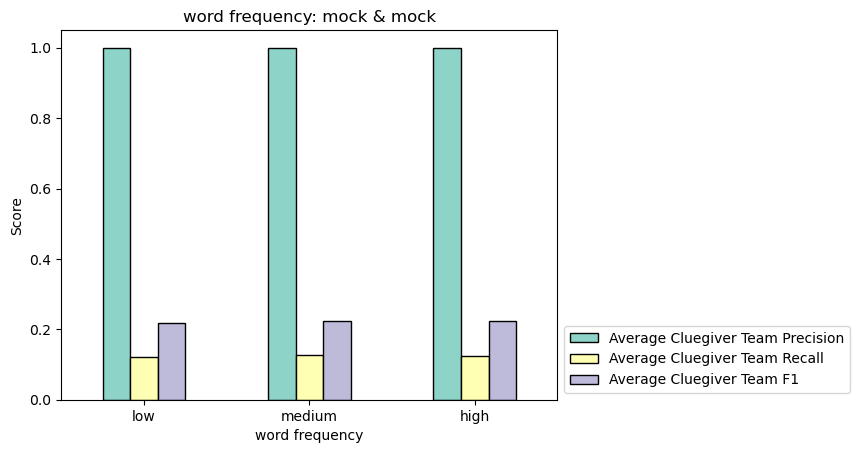

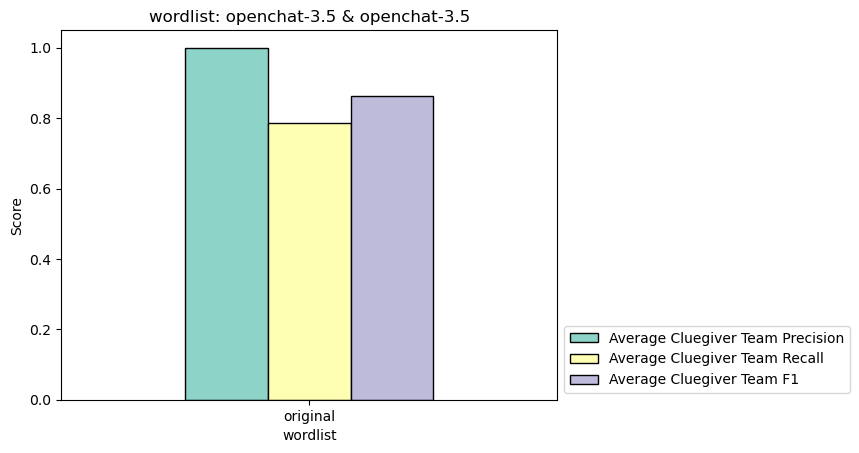

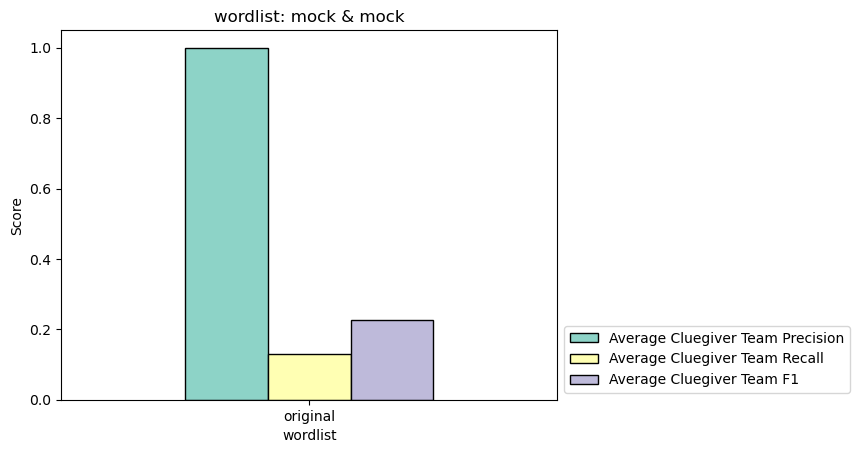

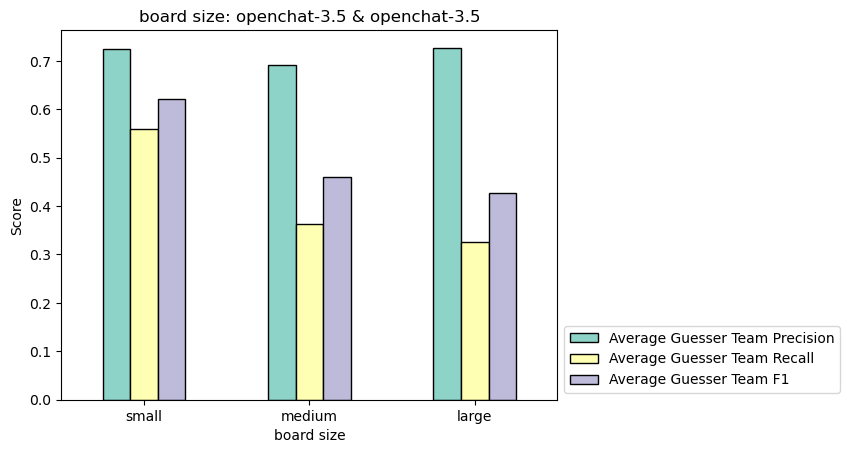

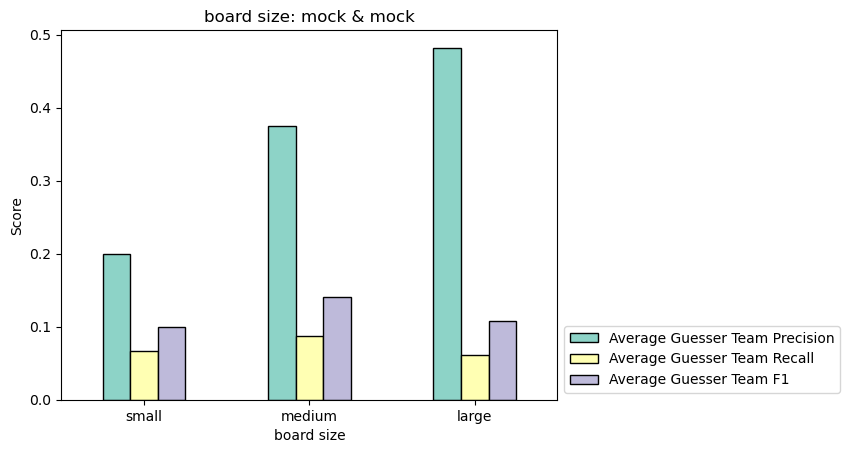

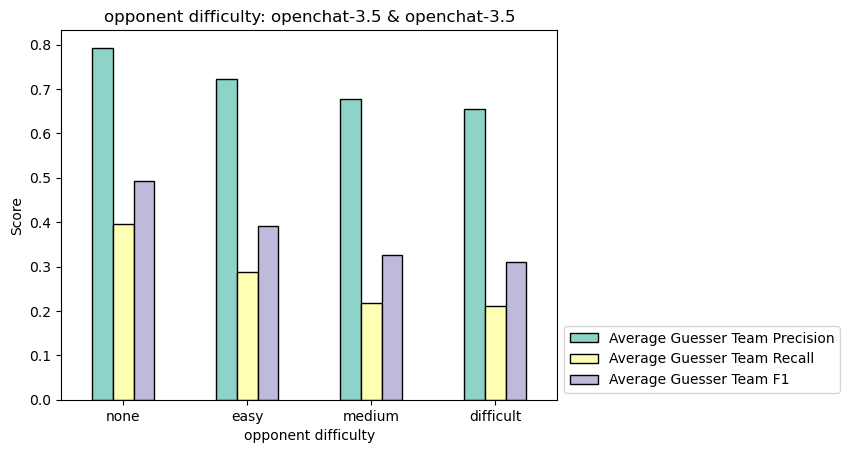

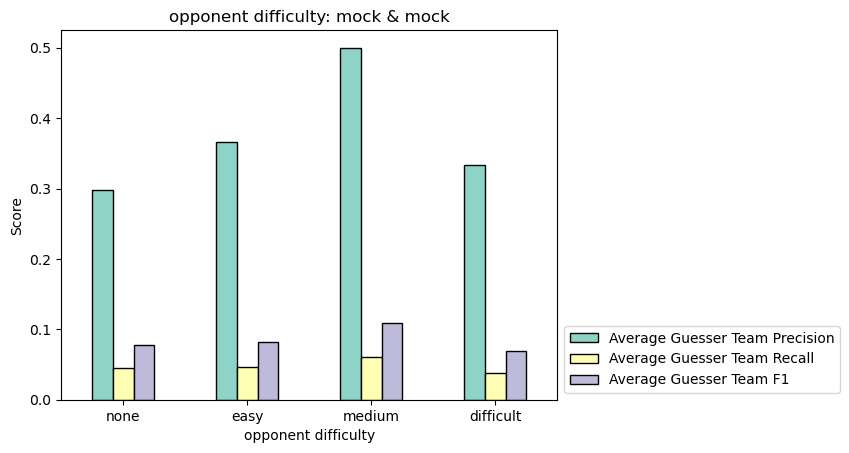

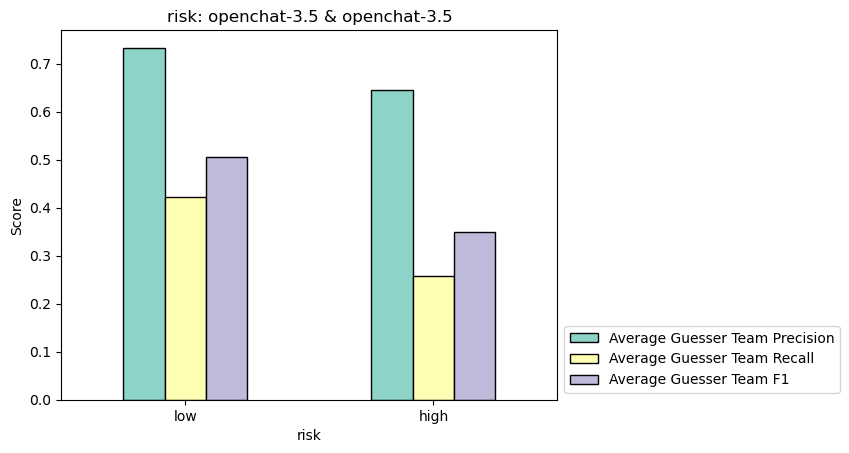

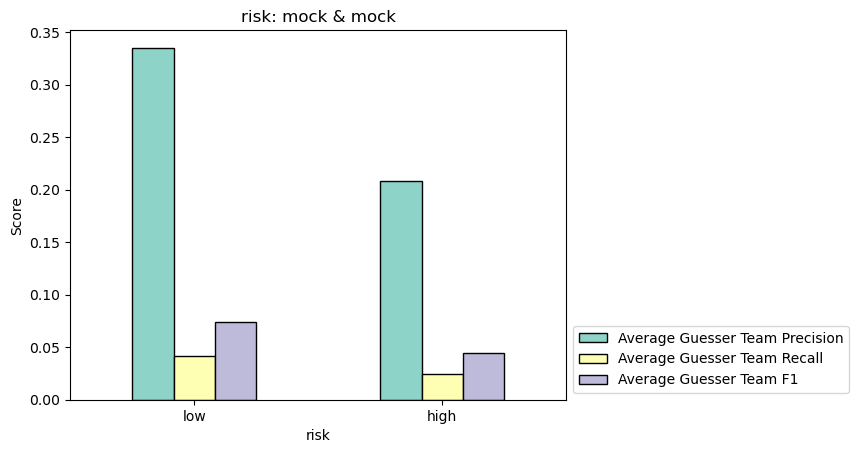

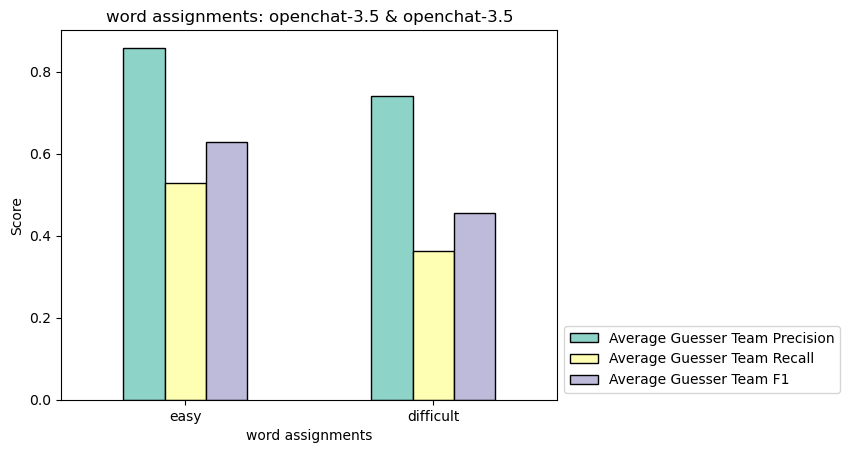

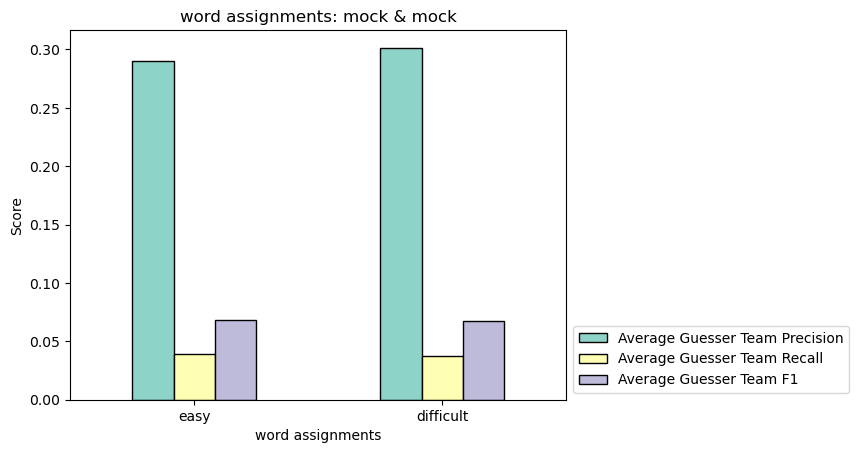

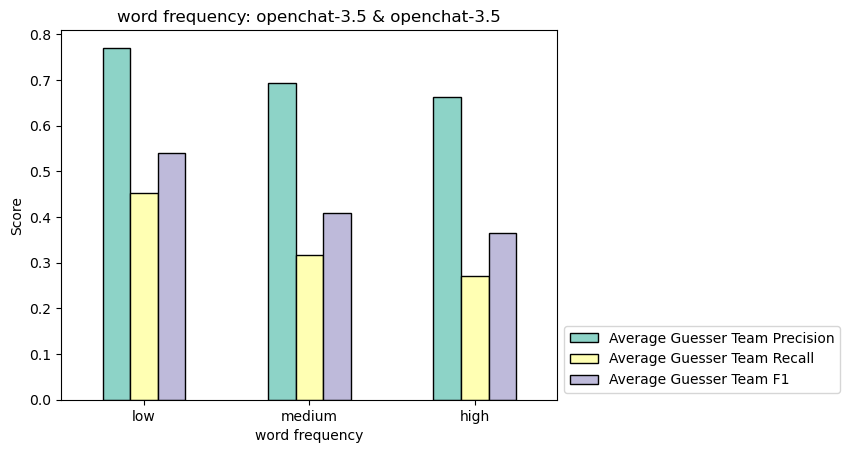

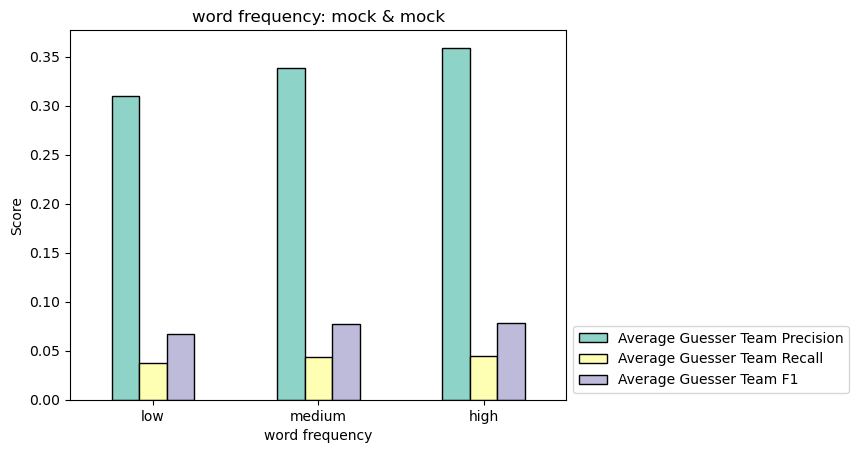

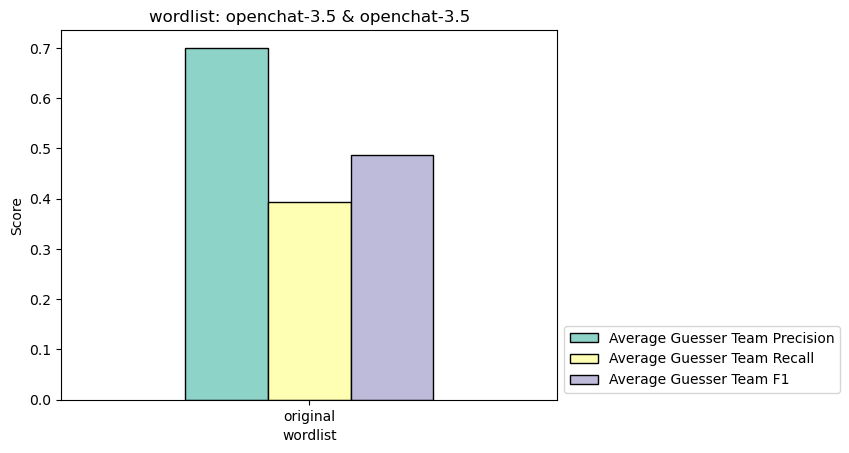

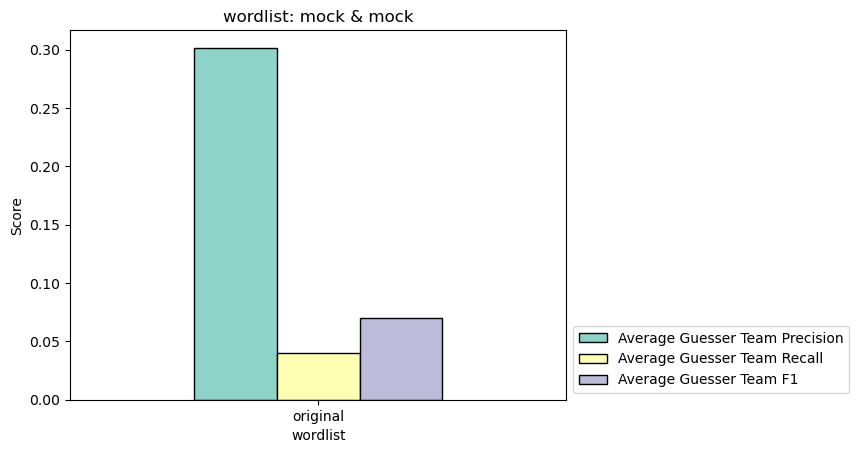

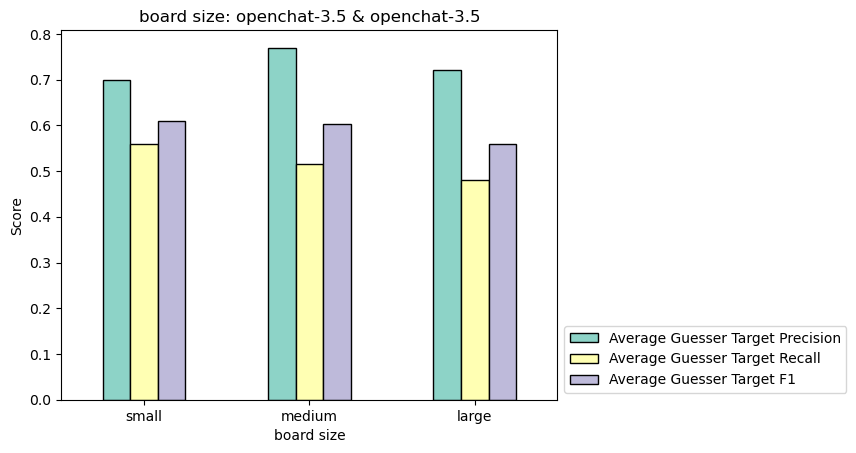

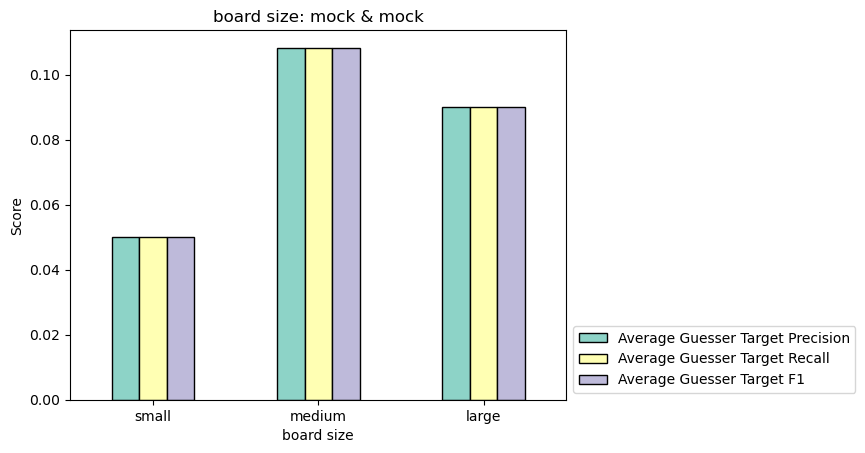

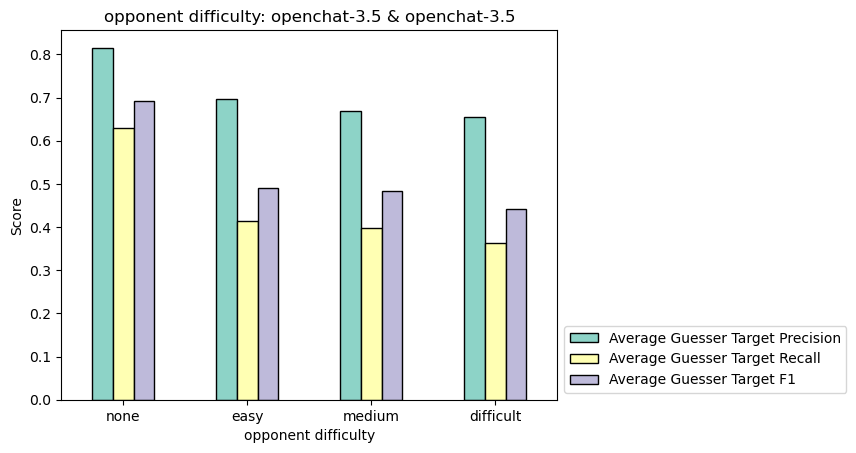

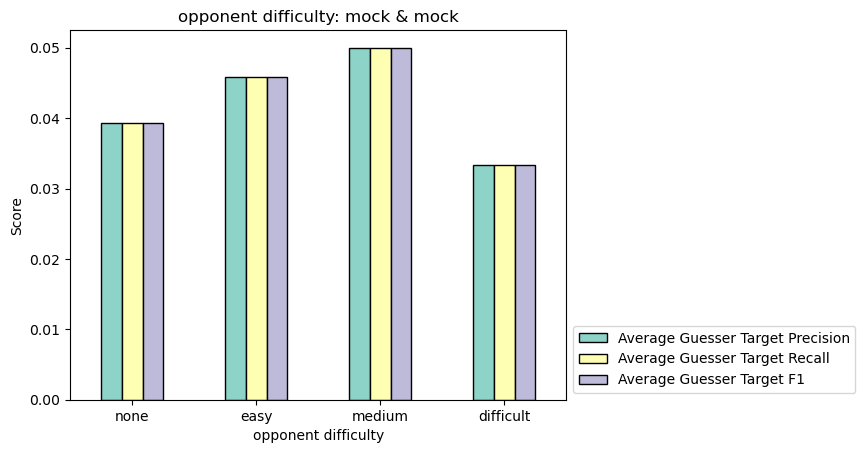

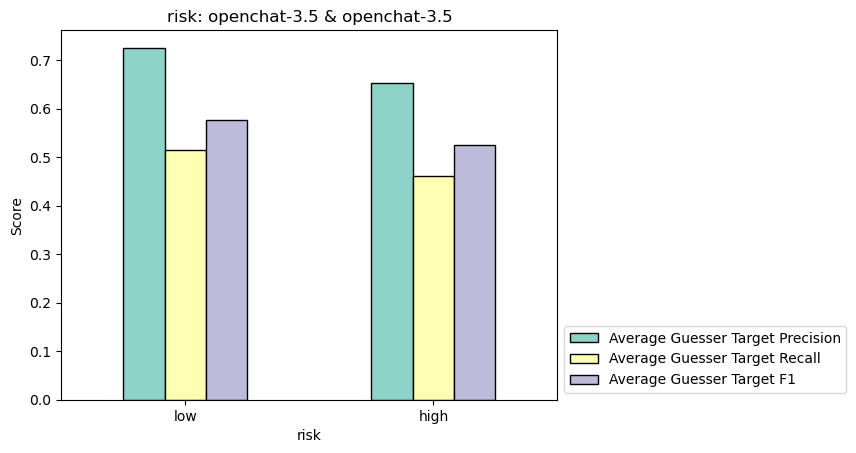

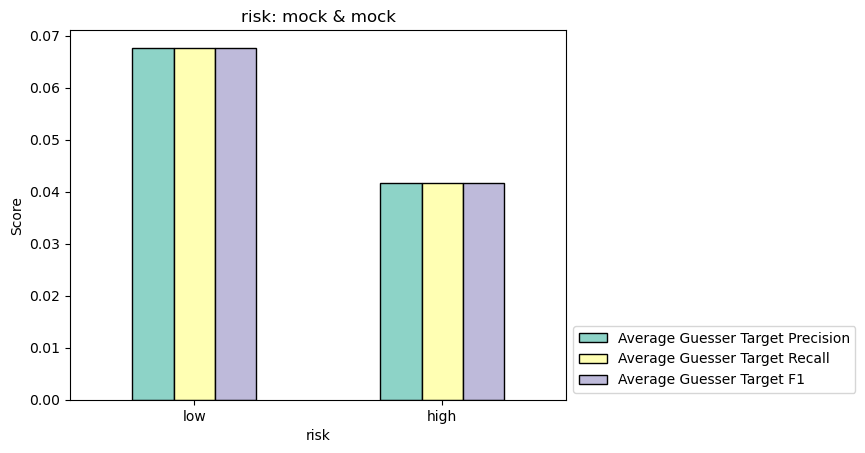

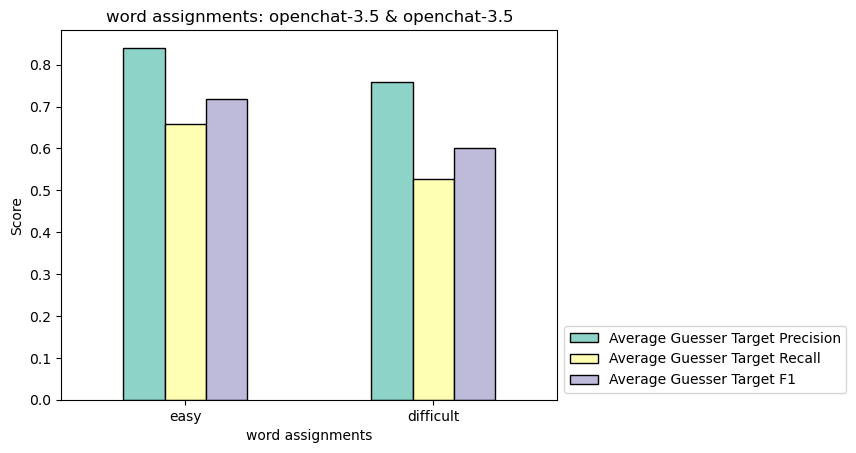

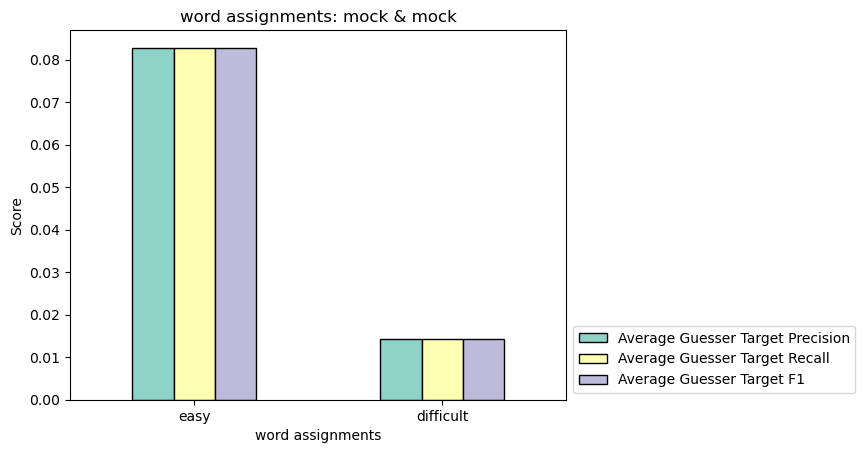

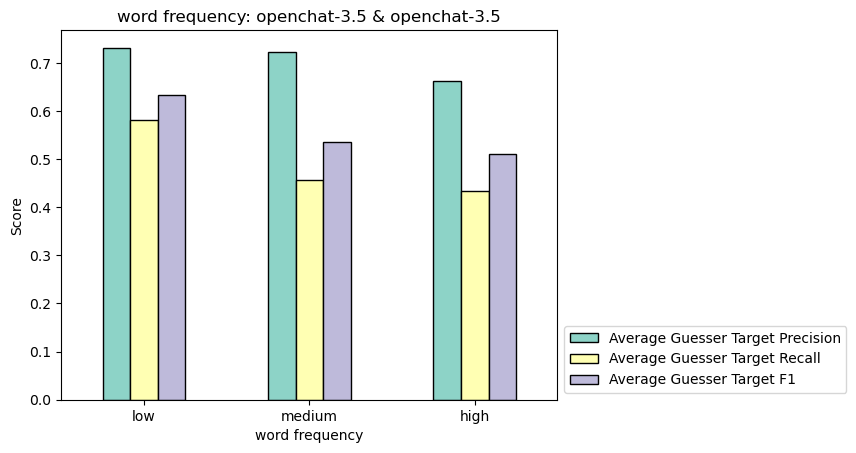

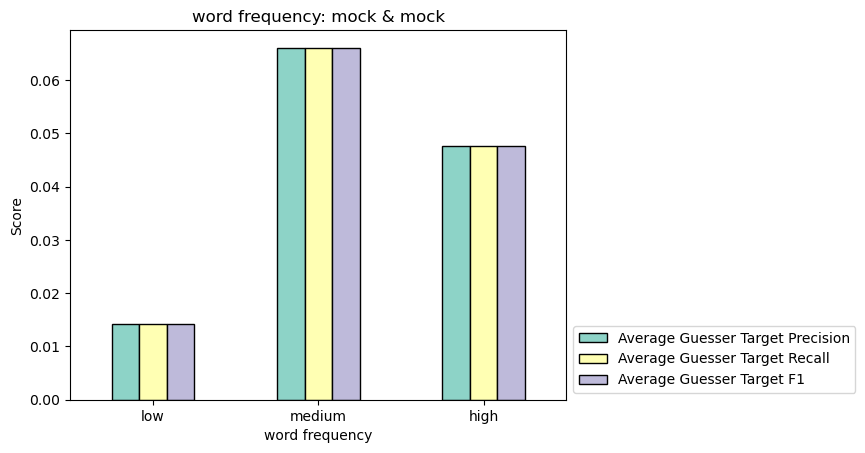

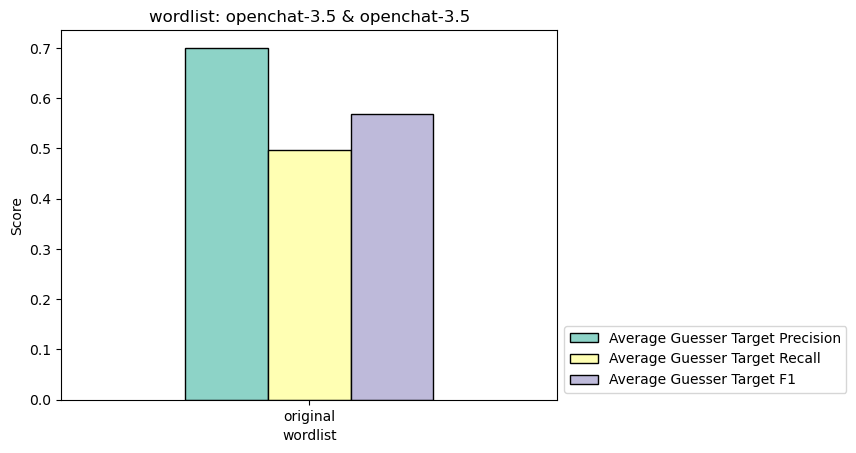

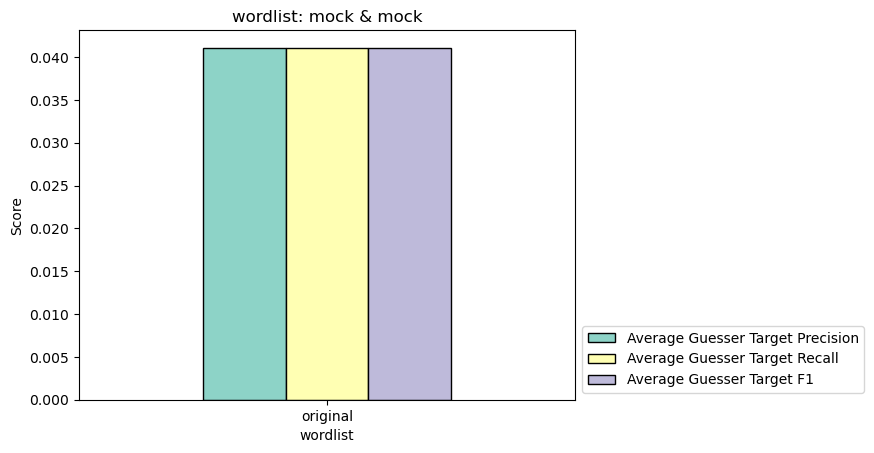

In [22]:
visualisation_parameters = [{
        "columns": ['Main Score', 'Episode Recall', 'Episode Negative Recall', 'Efficiency'],
        "colours": "Set2",
        "ylim": [0,1]
    }, 
    {
        "columns": ['Request Count', 'Parsed Request Count', 'Violated Request Count'],
        "colours": "Set1",
        "ylim": None
    }, 
    {
        "columns": ['Average Cluegiver Number of Targets', 'Average Guesser Number of Guesses'],
        "colours": "Set1",
        "ylim": None
    },
    {
        "columns" : ['Average Guesser Number of Revealed Words', 'Average Guesser Number of Unrevealed Guesses'],
        "colours": "Set3",
        "ylim": None
        
    },
    {
        "columns" : ['Average Cluegiver Team Precision', 'Average Cluegiver Team Recall', 'Average Cluegiver Team F1'],
        "colours": "Set3",
        "ylim": None
        
    },
    {
        "columns" : ['Average Guesser Team Precision', 'Average Guesser Team Recall', 'Average Guesser Team F1'],
        "colours": "Set3",
        "ylim": None
        
    },
    {
        "columns" : ['Average Guesser Target Precision', 'Average Guesser Target Recall', 'Average Guesser Target F1'],
        "colours": "Set3",
        "ylim": None
        
    }]

for params in visualisation_parameters:
    for experiment in experiment_csvs:
        if experiment == "all.csv":
            continue
        df = pd.read_csv(results_folder+experiment_folder+experiment)
        create_generic_visualisation(df, experiment, params["columns"], params["colours"], params["ylim"])

# Stacked bar plot for games played, aborted, won, lost

In [23]:
def create_played_metrics_vis(data, experiment_name):
    data = data[['model', 'experiment name', 'Success', 'Lose', 'Aborted']]
    STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']
    experiment_name = experiment_name.removesuffix('.csv')
    data.loc[:, 'model'] = improve_model_names(data['model'])


    for poi in ['model', 'experiment name']:
        instances = data[poi].unique()
        for instance in instances:
            df_instance = data[data[poi] == instance]
            df_instance = df_instance.drop(columns=[poi])
            index_col = df_instance.select_dtypes(exclude='number').columns[0]
            df_instance.set_index(index_col, inplace=True)

            df_instance = 100 * df_instance
            ax = df_instance.plot(kind='barh',
                        stacked=True,
                        title=f'{experiment_name}: {instance}',
                        figsize=(5, 5),
                        colormap=matplotlib.colors.ListedColormap(STACK_COLORS))
            ax.invert_yaxis()
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
            plt.xlabel('% of all episodes')
            plt.xlim(-1, 101)
            plt.ylabel('')
            plt.show()
            ax.figure.savefig(f'figures/{results_folder}{experiment_name}-Gameplay status.png', dpi=400, bbox_inches = 'tight')

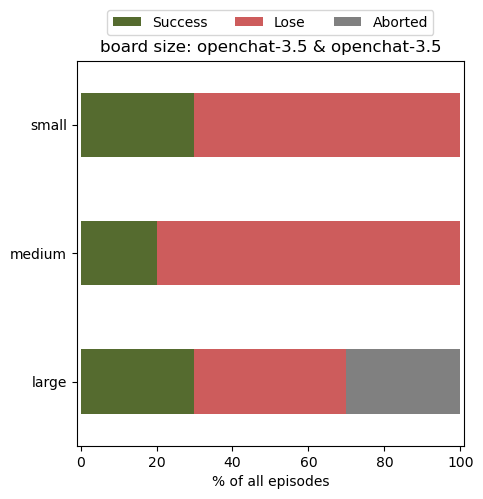

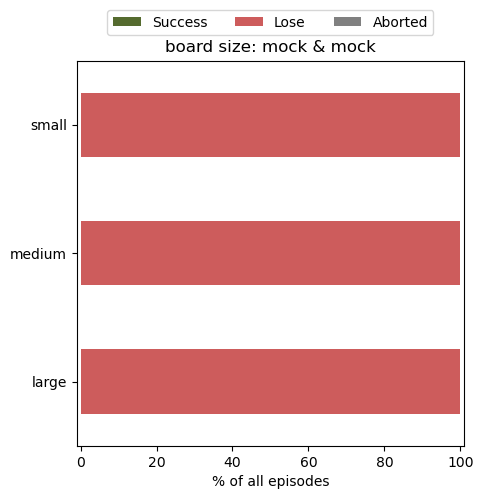

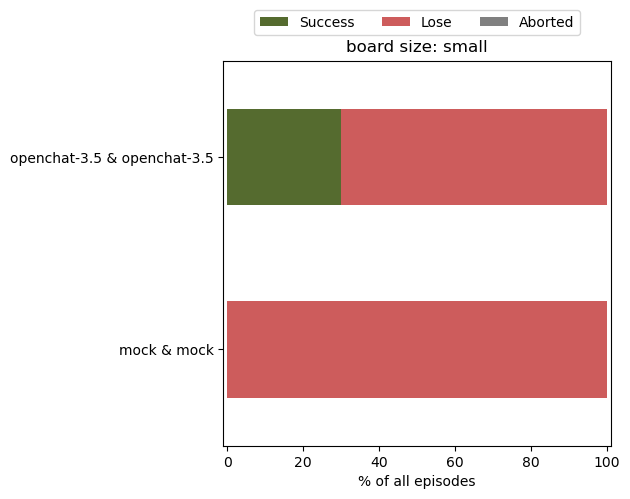

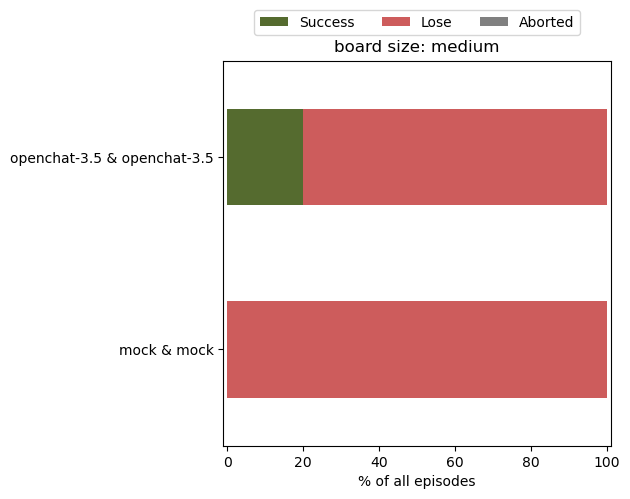

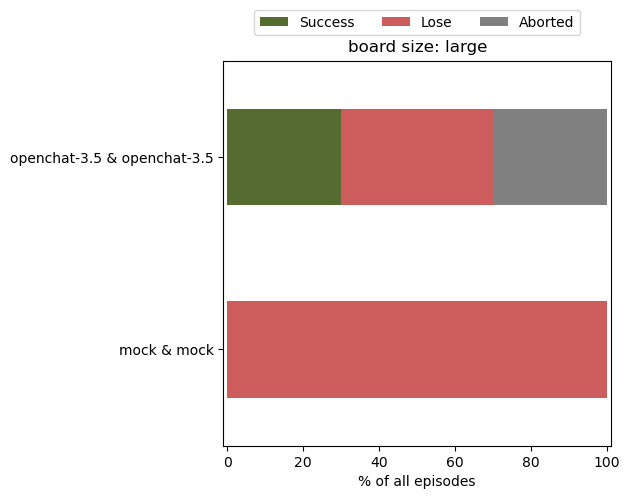

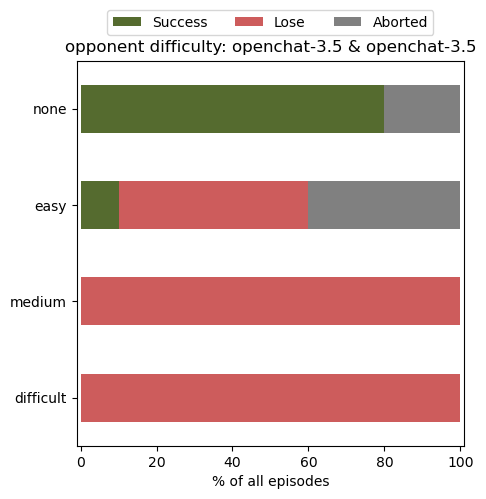

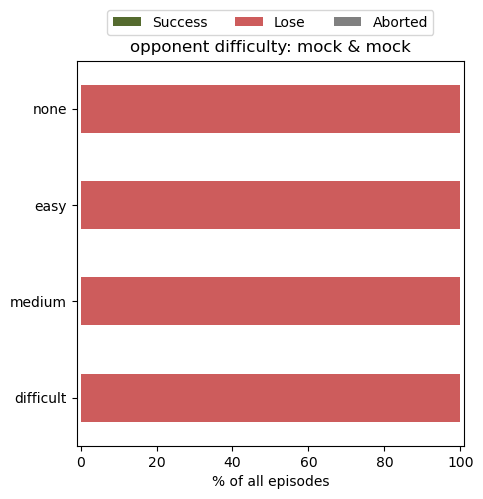

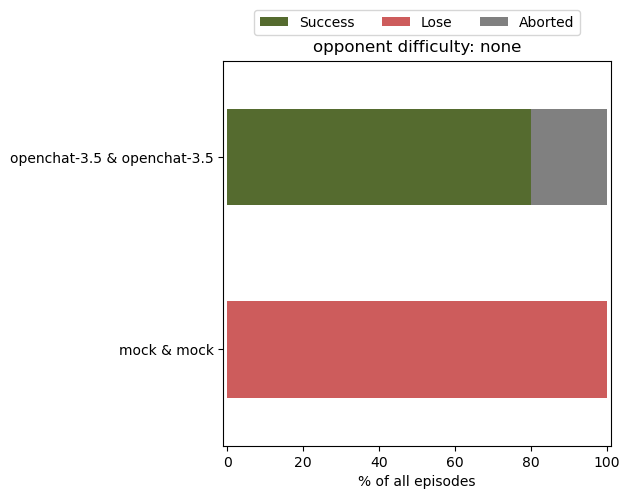

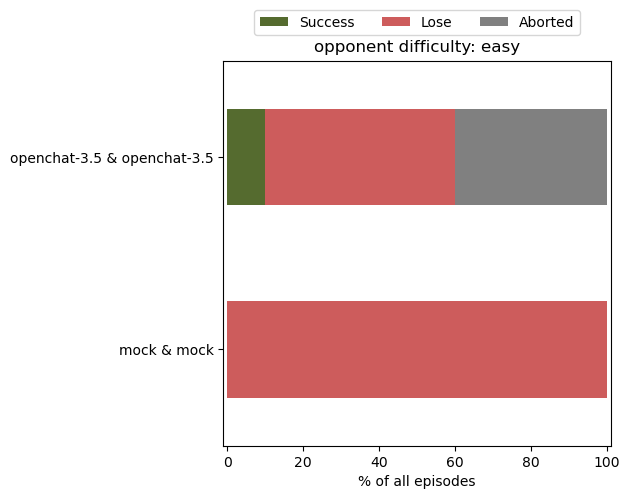

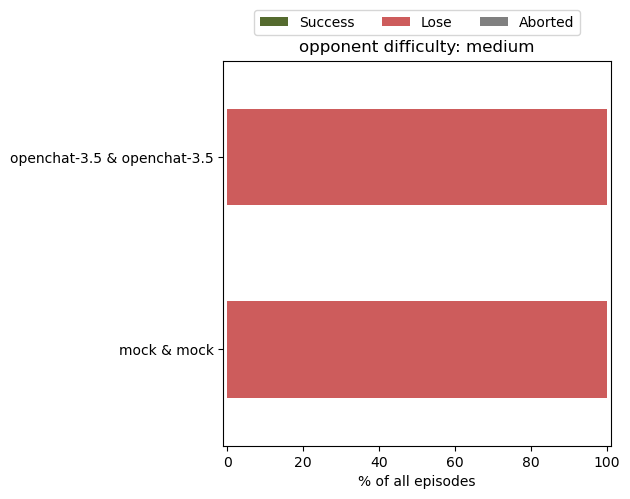

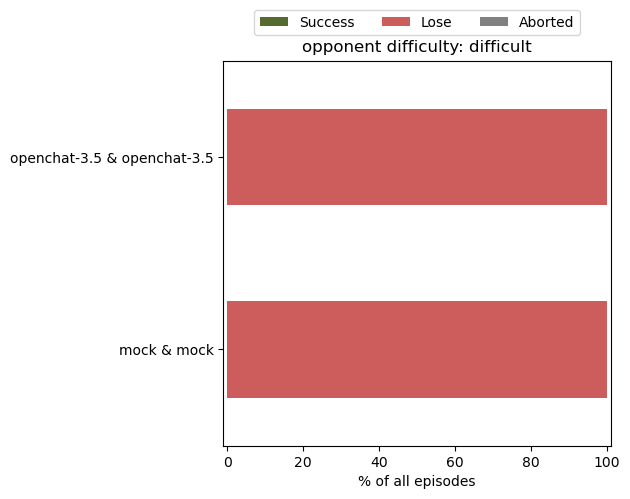

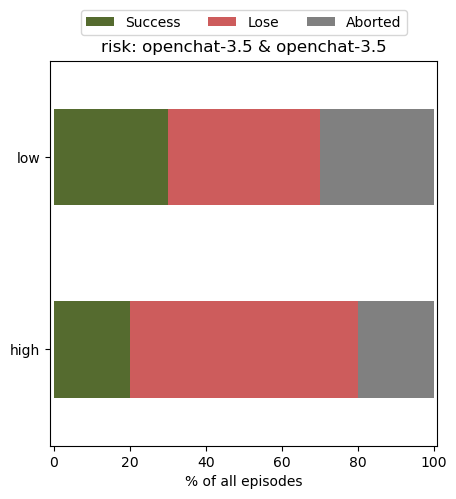

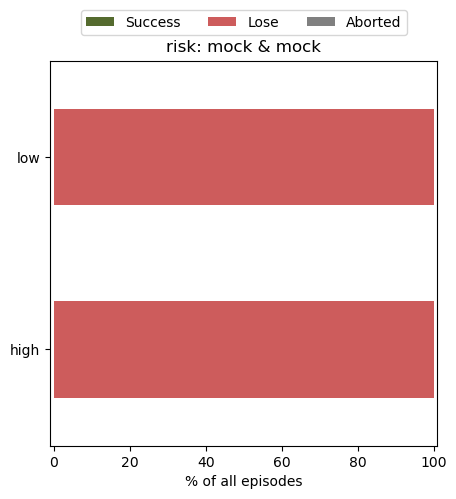

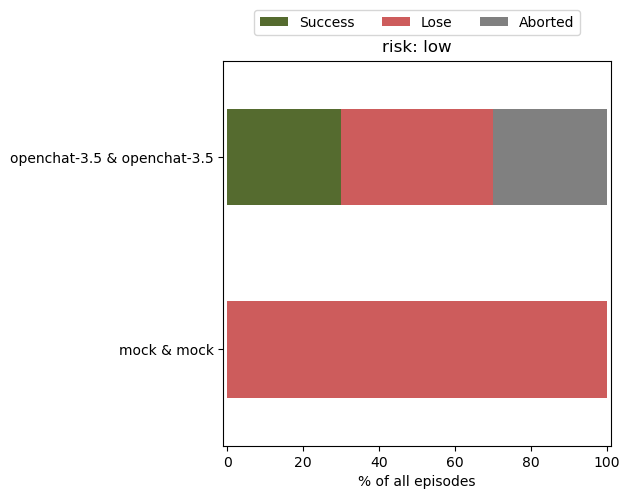

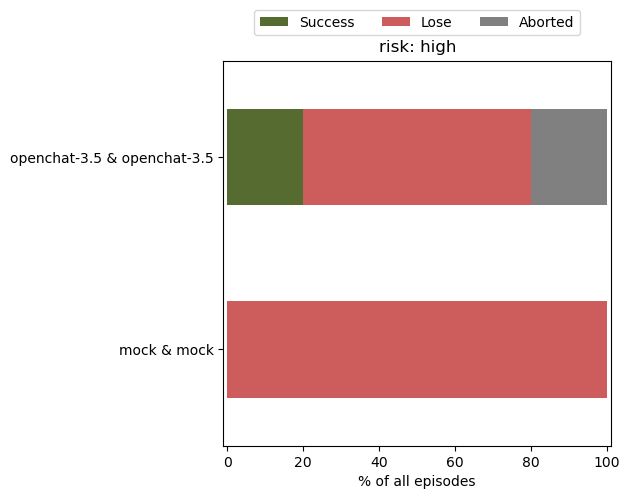

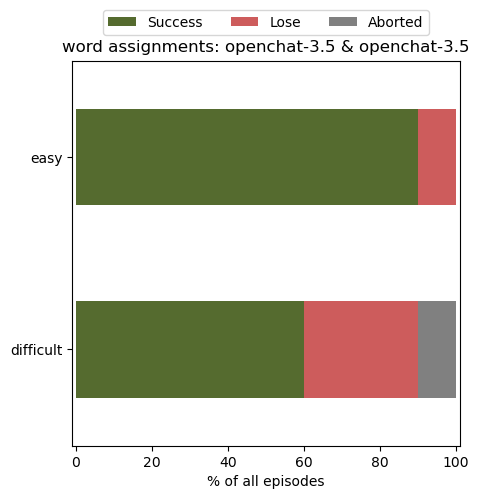

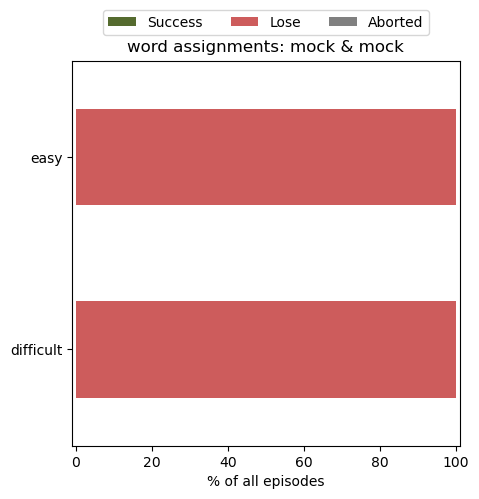

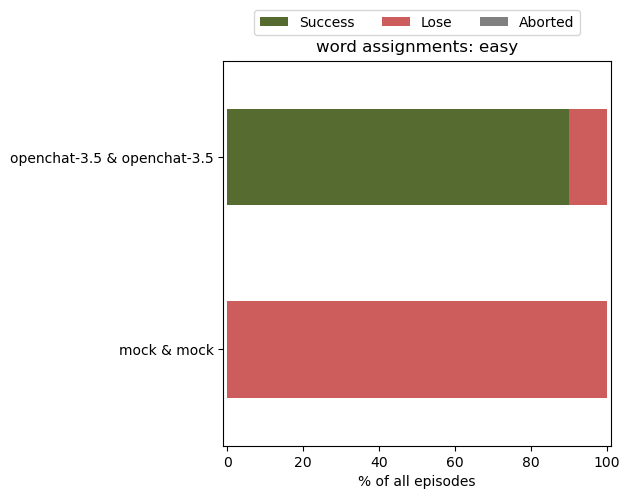

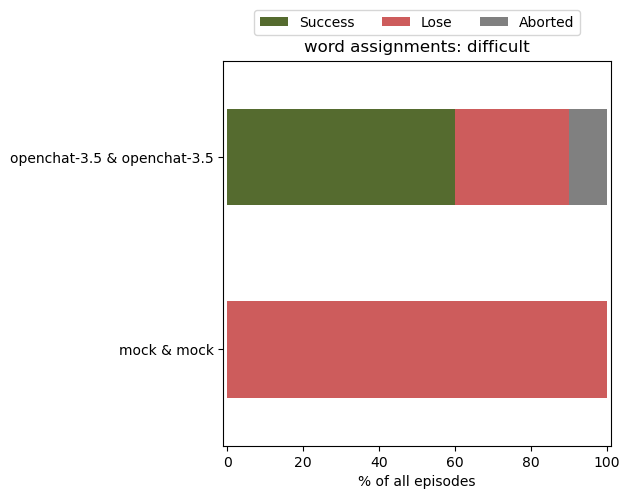

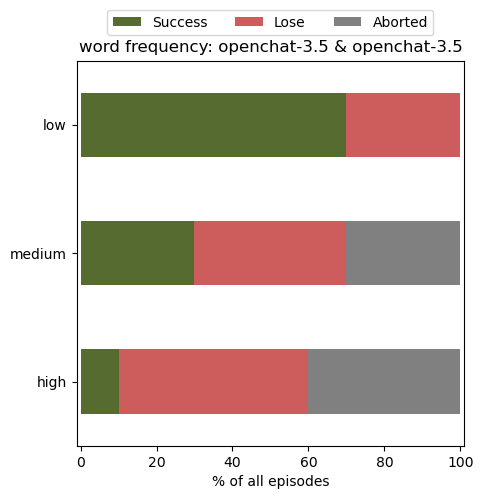

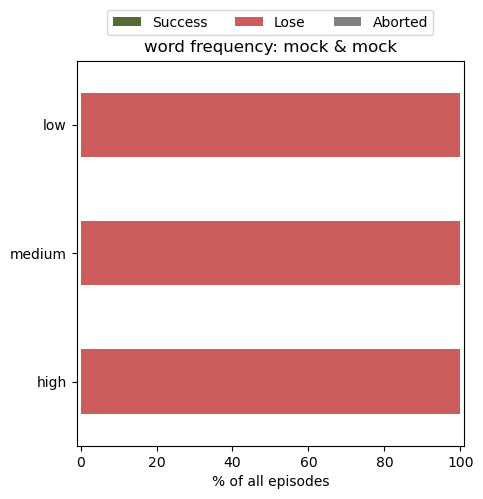

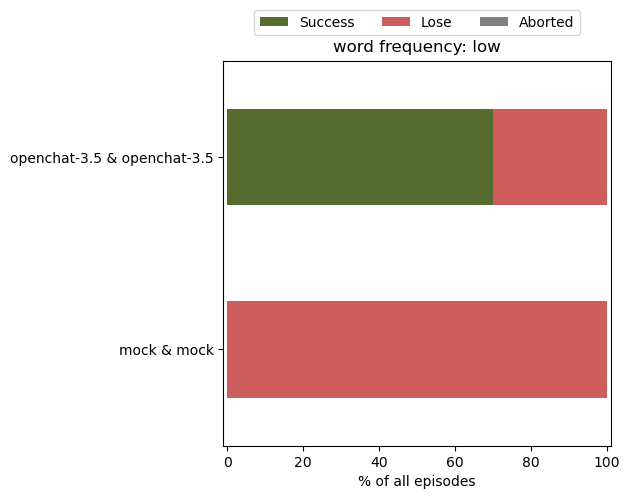

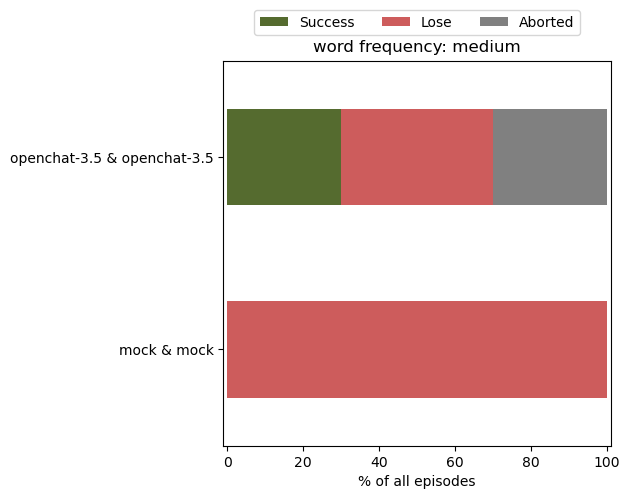

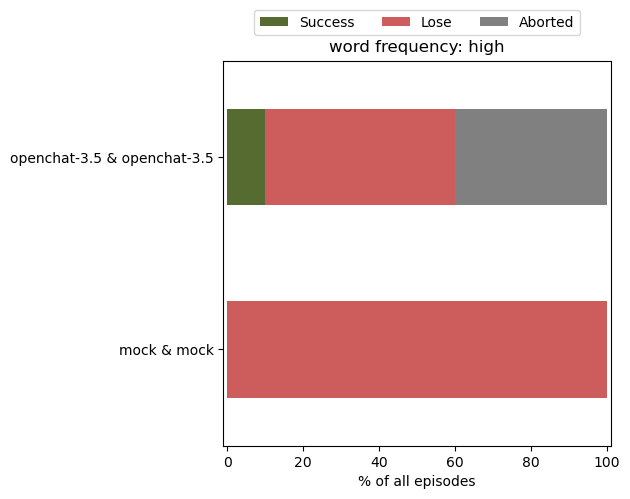

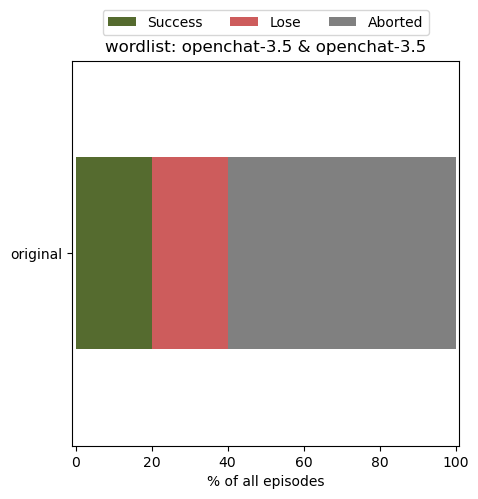

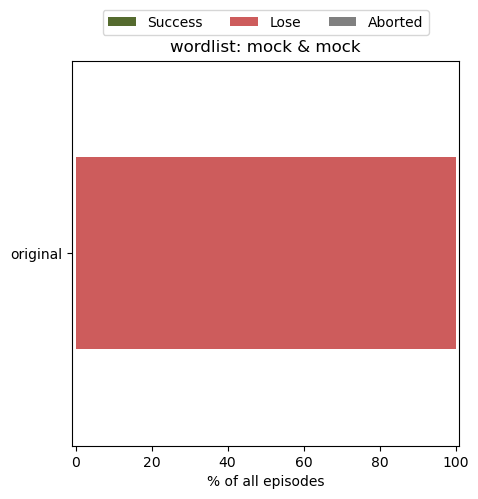

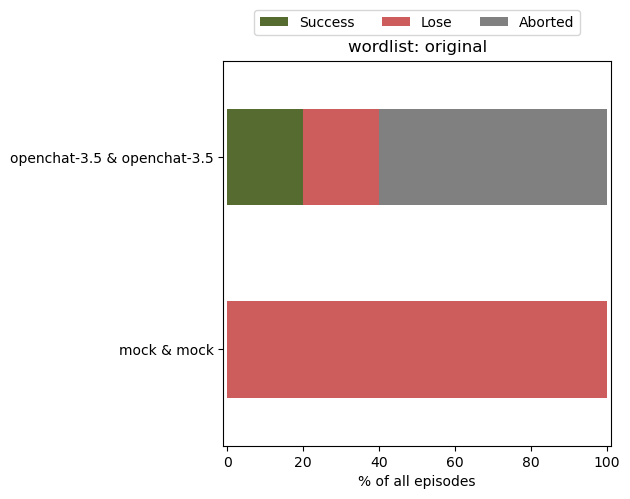

In [24]:
for experiment in experiment_csvs:
    if experiment == "all.csv":
        continue
    df = pd.read_csv(results_folder+experiment_folder+experiment)
    create_played_metrics_vis(df, experiment)

# Single-Metric Visualisations

In [25]:
def create_single_metric_visualisation(score, colours = "Set1"):
    for experiment_name in experiment_csvs:
        if experiment_name == "all.csv":
            continue
        data = pd.read_csv(results_folder+experiment_folder+experiment_name)
        experiment_name = experiment_name.removesuffix('.csv')
        data.loc[:, 'model'] = improve_model_names(data['model'])
        cmap = matplotlib.colormaps.get_cmap(colours)
        cmap = matplotlib.colors.ListedColormap(cmap.colors[0:max(len(data['model'].unique()), 3)])
        data.set_index(['model', 'experiment name'], inplace = True)
        df_score = data[[score]]    
        df_score = df_score.unstack(level=0, sort=False)
        df_score.columns = df_score.columns.droplevel(level=0)

        fig, ax = plt.subplots()           
        df_score.plot.bar(ax=ax, xlabel = experiment_name, ylabel = score, colormap=cmap, edgecolor = 'black', title=f'{experiment_name.removesuffix(".csv")}', rot=0)
        ax.legend(loc = "lower left", bbox_to_anchor=(1.0, 0.0))
        plt.show()
        fig.savefig(f'figures/{results_folder}{experiment_name}-{score}.png', dpi=400, bbox_inches = 'tight')

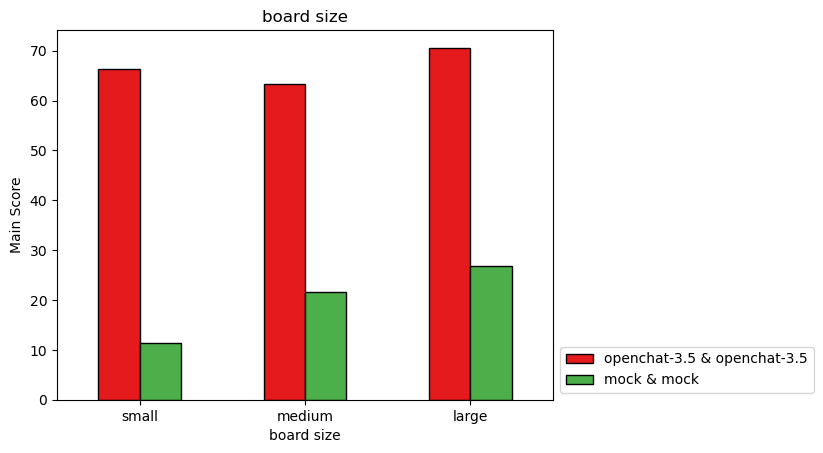

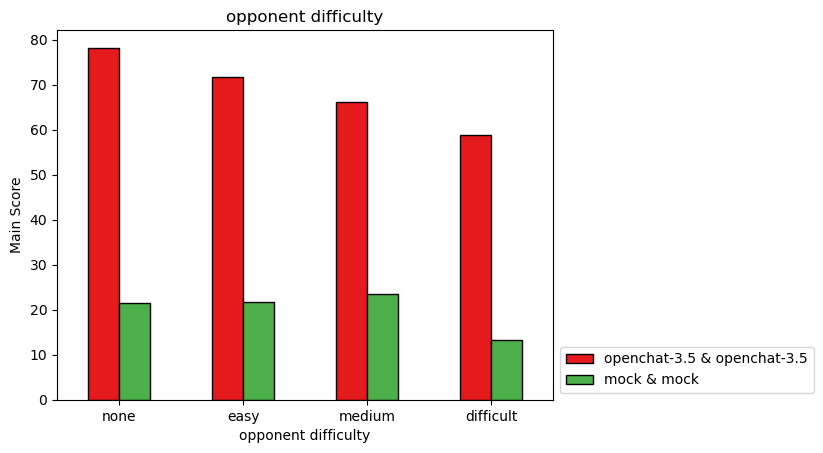

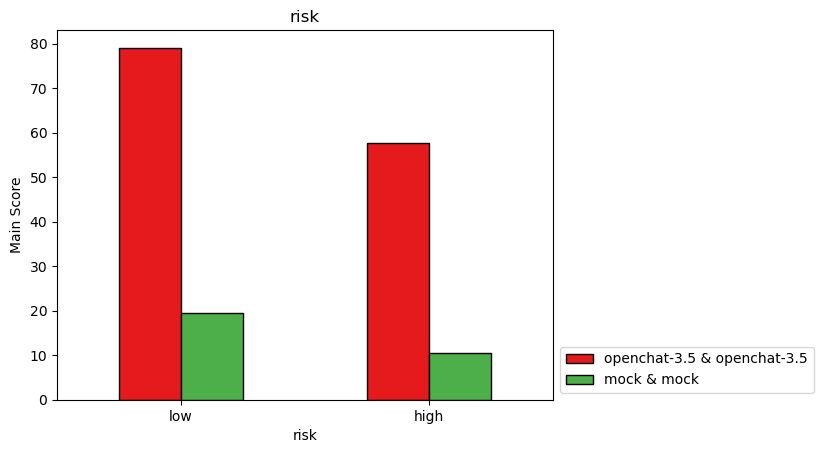

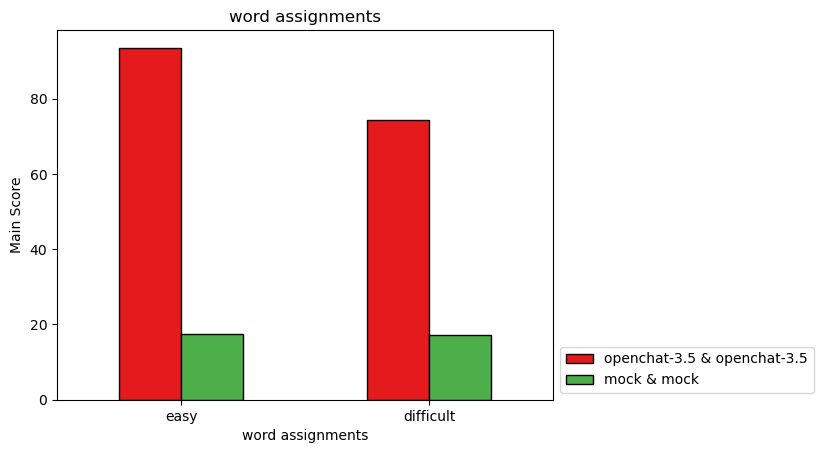

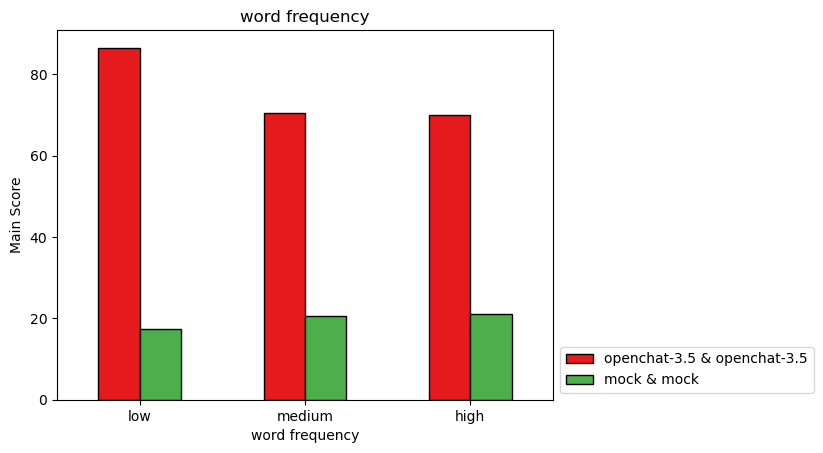

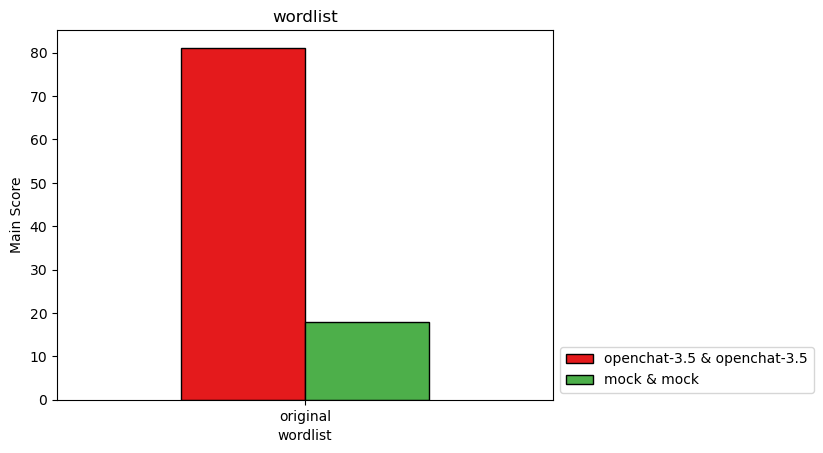

In [26]:
create_single_metric_visualisation('Main Score')

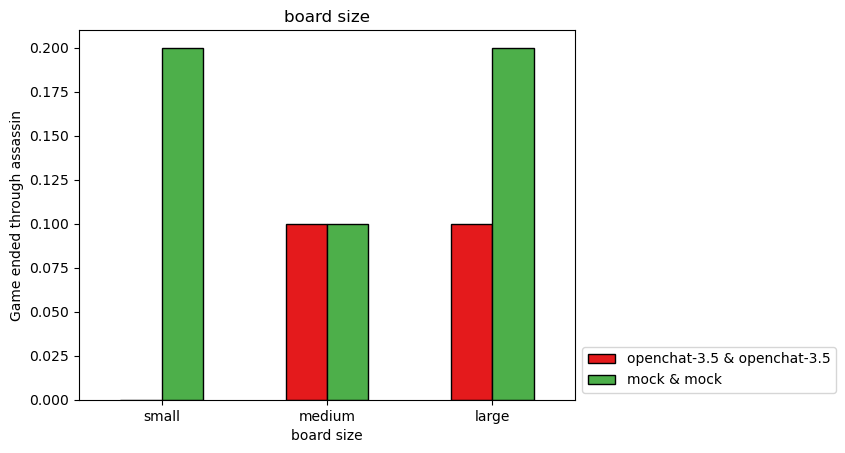

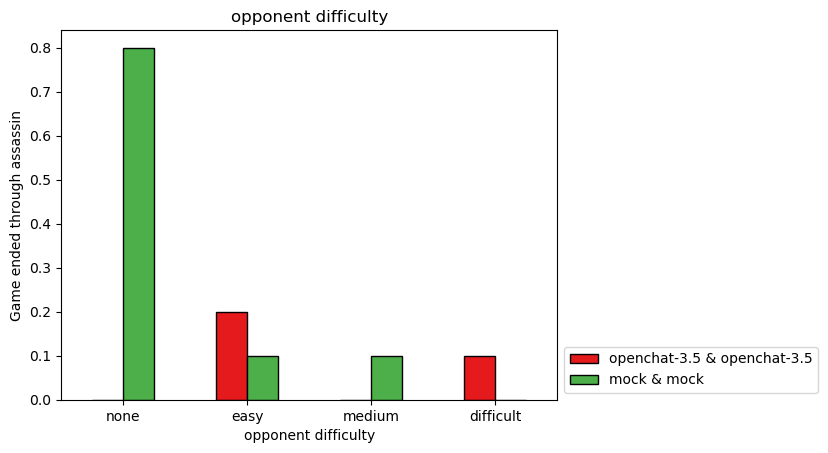

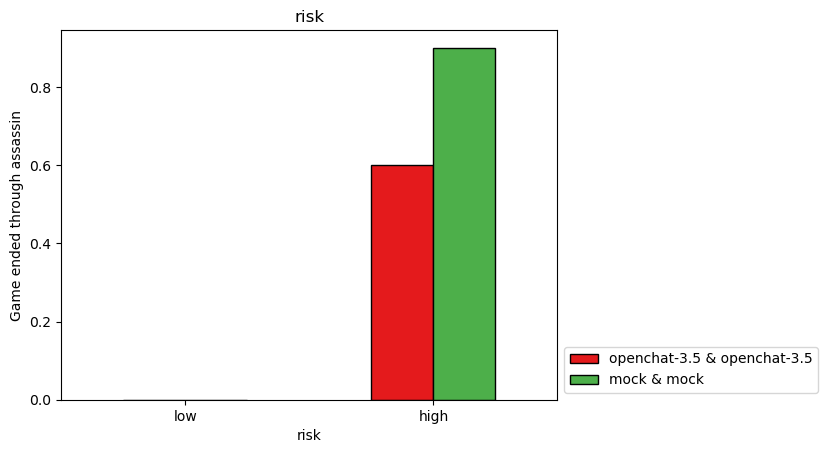

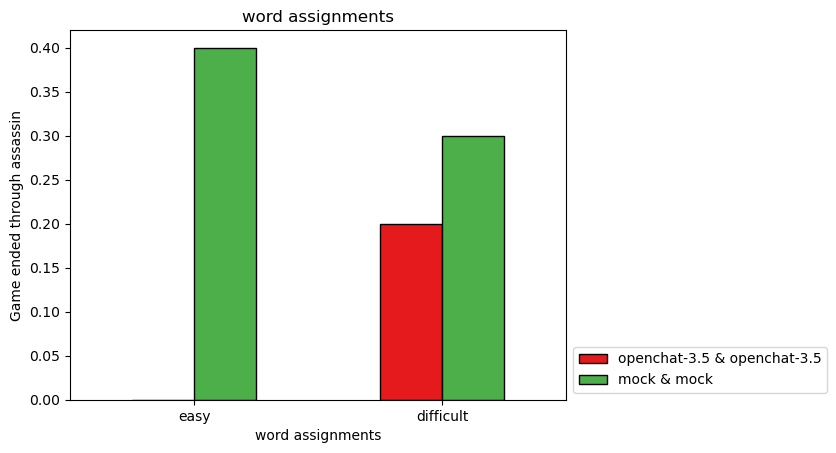

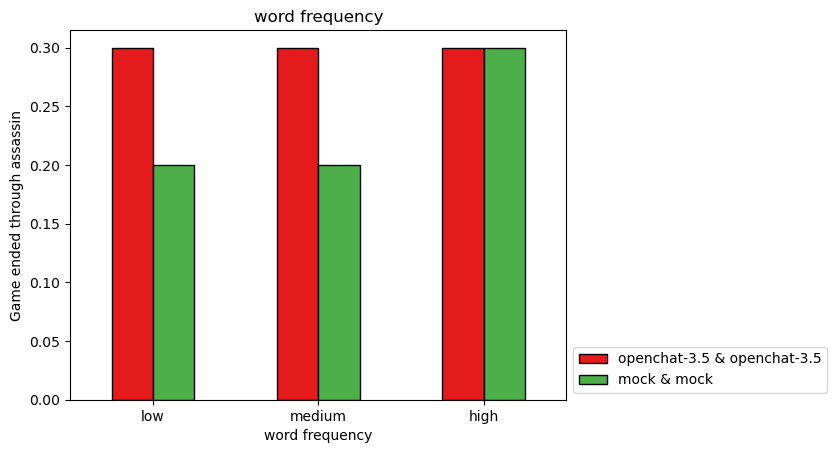

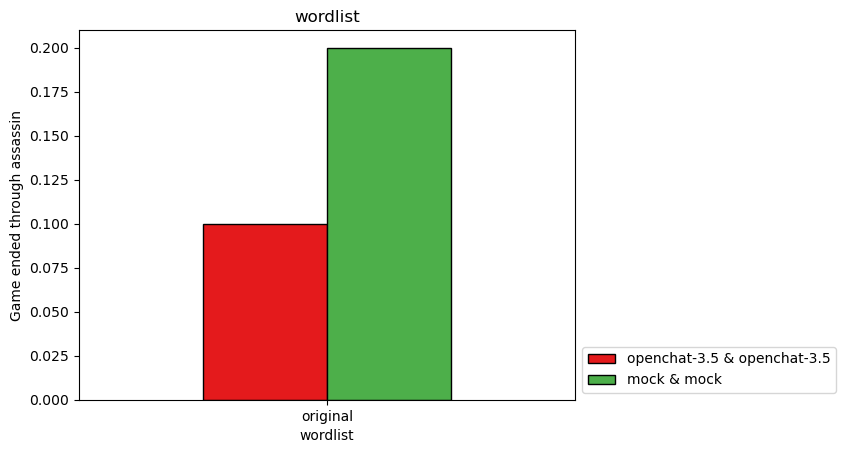

In [27]:
create_single_metric_visualisation('Game ended through assassin')

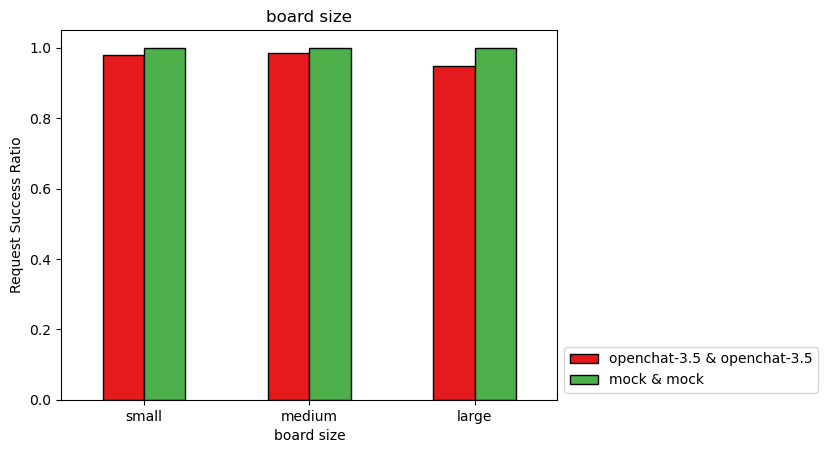

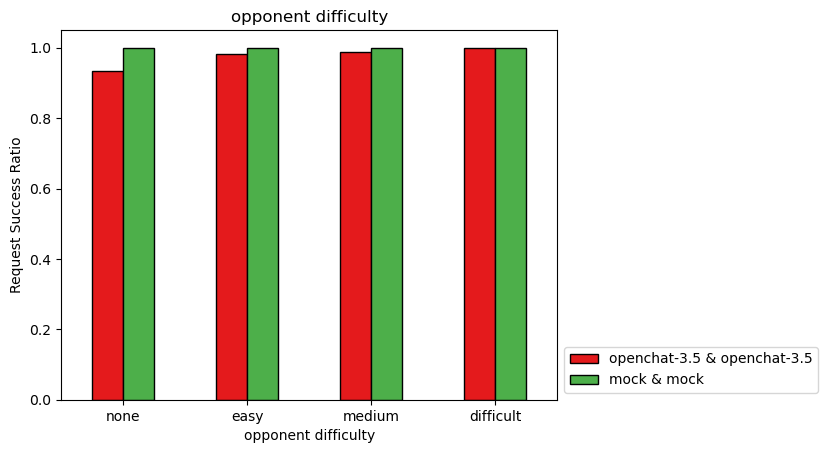

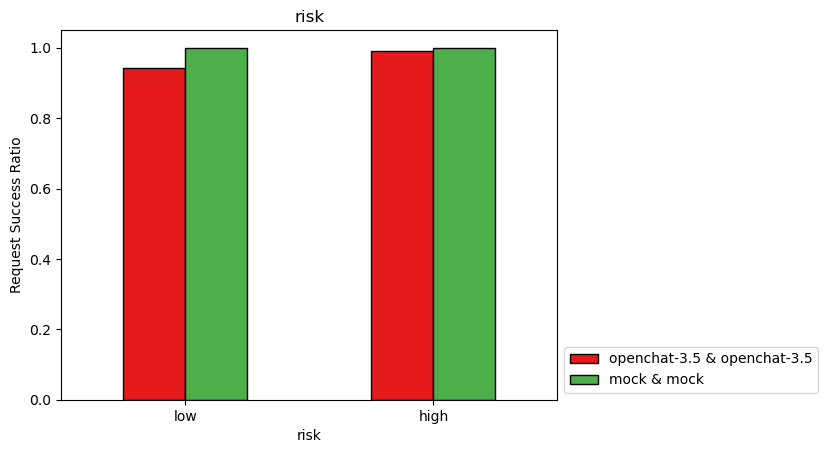

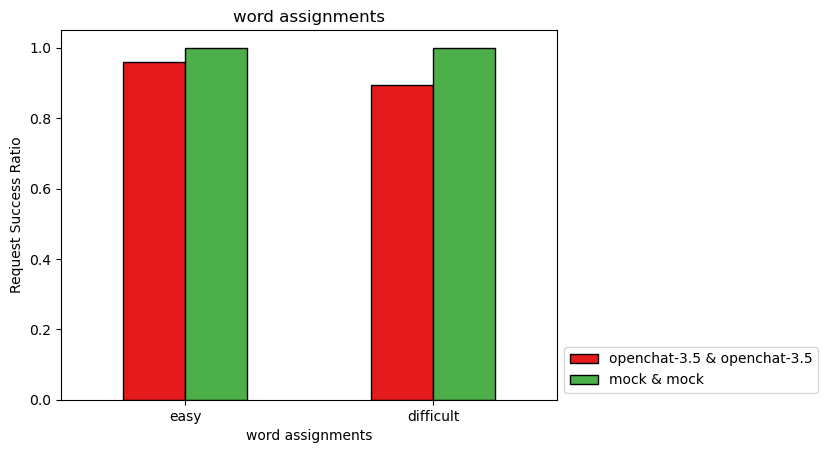

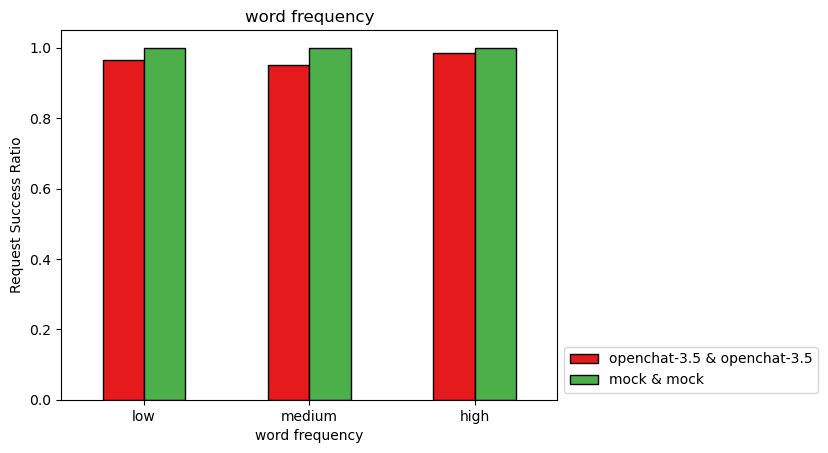

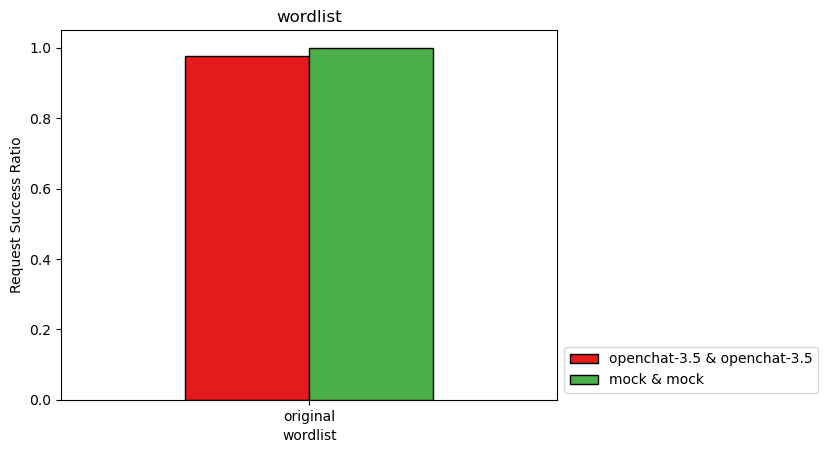

In [28]:
create_single_metric_visualisation('Request Success Ratio')

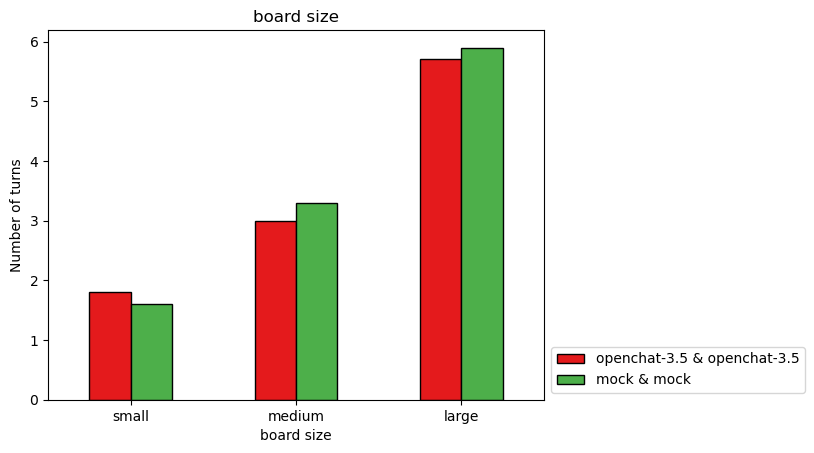

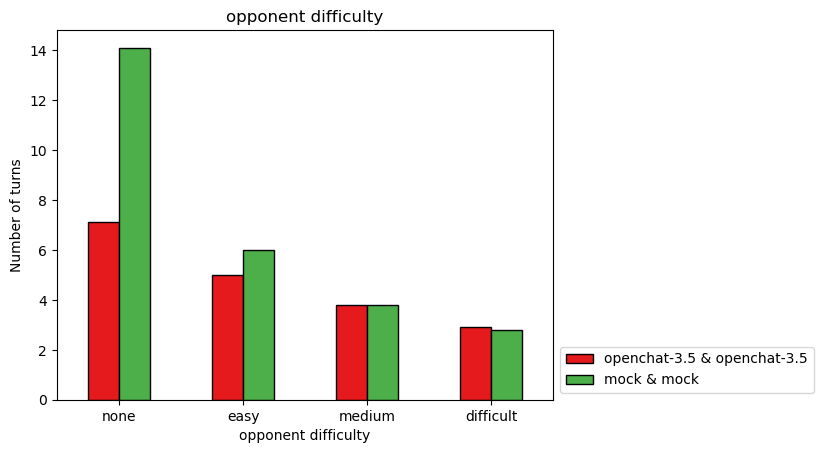

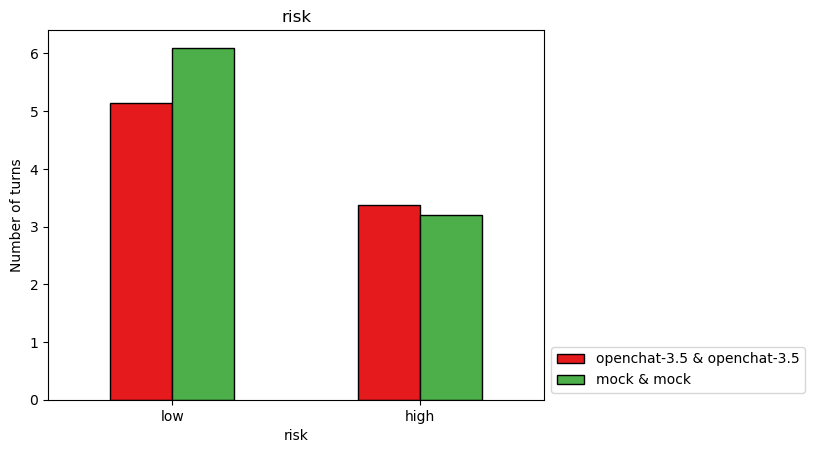

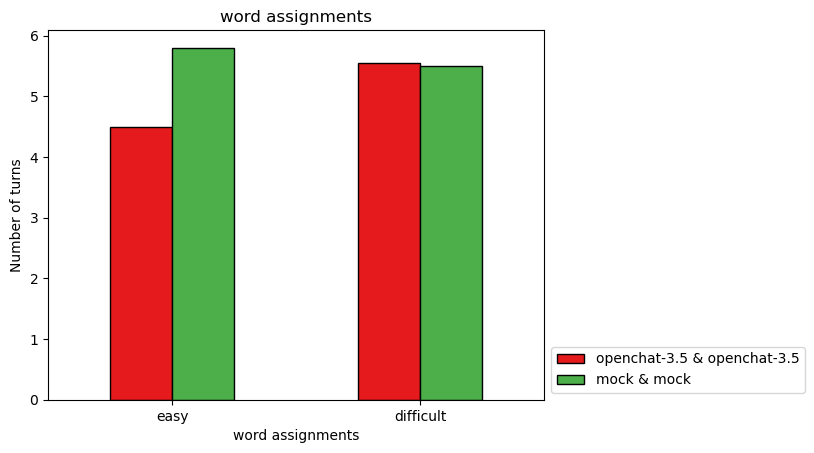

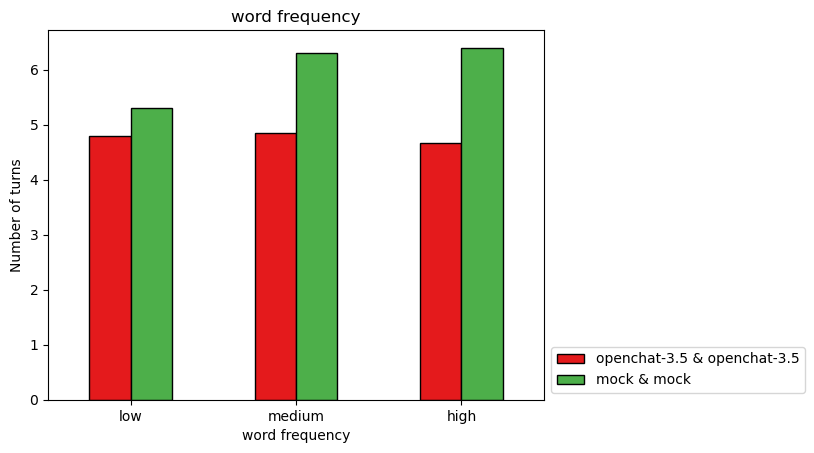

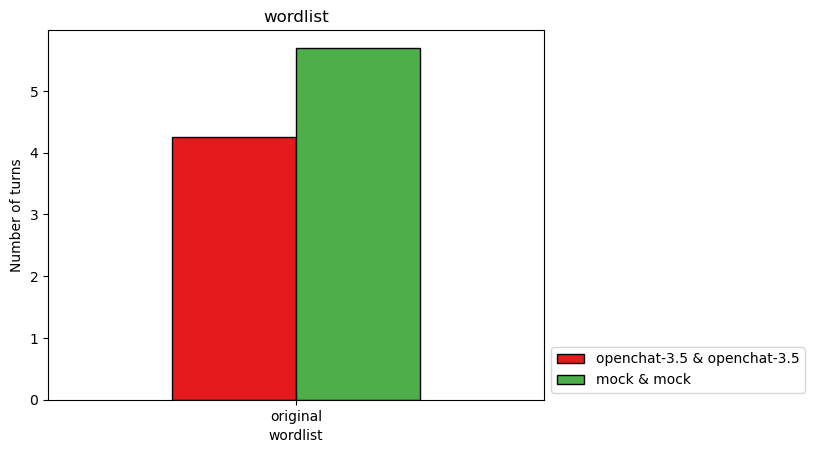

In [29]:
create_single_metric_visualisation('Number of turns')

- [x] 'Aborted','Played','Success', 'Lose',
- [x] 'Main Score', 'efficiency', 'episode negative recall', 'episode recall'
- [x] 'Game ended through assassin',
- [x] 'Parsed Request Count', 'Request Count', 'Violated Request Count'
- [x] 'Request Success Ratio'
- [x] 'Number of turns'
- [x] 'average cluegiver number of targets', 'average guesser number of guesses',
- [x] 'average guesser number of revealed words', 'average guesser number of unrevealed guesses',
- [x] 'average cluegiver team f1', 'average cluegiver team precision', 'average cluegiver team recall',
- [x] 'average guesser target f1', 'average guesser target precision', 'average guesser target recall', 
- [x] 'average guesser team f1', 'average guesser team precision', 'average guesser team recall',
- [ ] flags: 'Cluegiver ignore false targets or guesses', 'Cluegiver ignore number of targets', 'Cluegiver ignore rambling', 'Cluegiver reprompt on error', 'Cluegiver strip words', 'Guesser ignore false targets or guesses', 'Guesser ignore number of targets', 'Guesser ignore rambling',
       'Guesser reprompt on error', 'Guesser strip words',
       
       
       